### **■ 유통 판매량 예측 및 재고 최적화**
# **단계 1: 데이터 탐색**

<img src = "https://github.com/Jangrae/img/blob/master/store.png?raw=true" width=800, align="left"/>

# **⏰ 수행 과제**

다음과 같은 과정으로 프로젝트를 진행합니다.

#### **1. 환경 설정**
- 이후 진행에 필요한 환경 설정을 수행합니다.


#### **2. 데이터 탐색**
- 대상 데이터에 대해 충분히 탐색합니다.
- 특히 시계열 패턴을 찾기 위한 다양한 시각화를 수행합니다.
- 탐색 결과를 기반으로 이후에 새로운 변수를 추가하게 됩니다.


#### **📢 예측해야 할 핵심 상품 역할 분담**
- 핵심 상품별로 데이터를 탐색하고 가설을 수립해야 합니다.
- 2인당 핵심 상품 하나씩 분담하여 과제를 수행합니다.
- 팀 미팅을 통해 진행 사항을 공유하고 내용을 취합해 정리합니다.


#### **📢 대상 상품(핵심 상품)**

| Product_ID|Product_Code|SubCategory|Category|LeadTime|Price|
|----|----|----|----|----|----|
|3|DB001|Beverage|Drink|2|8|
|12|GA001|Milk|Food|2|6|
|42|FM001|Agricultural products|Grocery|2|5|

# **1. 환경 설정**

- 이후 진행에 필요한 환경 설정을 수행합니다.

## **(1) 경로 설정**

- 프로젝트 수행 환경에 맞게 파일 경로를 설정합니다.

### **1) 로컬 수행(Anaconda)**
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# # 기본 경로
# path = ''

### **2) 구글 콜랩 수행**

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [2]:
# 구글 드라이브 연결, 패스 지정
# import sys
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     path = '/content/drive/MyDrive/KT 에이블스쿨/미니프로젝트/4차 미니프로젝트/'

## **(2) 라이브러리 불러오기**

- 이후 사용할 기본 라이브러리를 불러옵니다.

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## **(3) 데이터 불러오기**

- 이후 분석 대상이 되는 파일을 불러오고 기본 정보를 확인합니다.

### **1) 데이터 불러오기**

- 분석 대상인 학습용 데이터를 불러옵니다.
- 데이터프레임 이름은 다음과 같이 통일합니다.
    - sales: 판매 정보
    - orders: 고객 방문수
    - oil_price: 휘발유 가격
    - stores: 매장 정보
    - products: 상품 정보
- 날짜 데이터를 갖는 Date 변수는 이후 편의를 위해 datetime 형으로 변환합니다.

In [4]:
# 데이터 불러오기
sales = pd.read_csv('sales_train.csv')
orders = pd.read_csv('orders_train.csv')
oil_price = pd.read_csv('oil_price_train.csv')
stores = pd.read_csv('stores.csv')
products = pd.read_csv('products.csv')

In [5]:
# datetime 형으로 변환
sales['Date'] = pd.to_datetime(sales['Date'] )
oil_price['Date'] = pd.to_datetime(oil_price['Date'] )
orders['Date'] = pd.to_datetime(orders['Date'] )

### **2) 기본 정보 확인**

- 각 데이터의 기본 정보를 확인합니다.
- Date 변수가 있는 데이터의 날짜 범위(최솟값, 최댓값)를 확인합니다.

In [6]:
print('sales 날짜 범위 :',sales['Date'].min(), '~', sales['Date'].max())
print('oil_price 날짜 범위 :',oil_price['Date'].min(), '~', oil_price['Date'].max())
print('orders 날짜 범위 :',orders['Date'].min(), '~', orders['Date'].max())

sales 날짜 범위 : 2014-01-01 00:00:00 ~ 2017-02-28 00:00:00
oil_price 날짜 범위 : 2014-01-01 00:00:00 ~ 2017-02-28 00:00:00
orders 날짜 범위 : 2014-01-01 00:00:00 ~ 2017-02-28 00:00:00


# **2. 데이터 탐색**

- 대상 데이터에 대해 충분히 탐색합니다.
- 특히 시계열 패턴을 찾기 위한 다양한 시각화를 수행합니다.
- 탐색 결과를 기반으로 이후에 새로운 변수를 추가하게 됩니다.

## **(1) 기본 데이터 탐색**

- 개별 데이터에 대한 충분한 탐색을 수행합니다.
- 다음과 같은 탐색이 포함될 수 있습니다.
    - 각 데이터 결측치 존재 여부 확인
    - 각 데이터에 포함된 범줏값 비율 확인
    - 각 데이터에 포함된 연속값 범위와 분포 확인
    - 기타 등등...

### **1) 결측치 확인**

- 데이터로 결측치 존재 여부를 확인합니다.

In [7]:
print(sales.isnull().sum())
print(orders.isnull().sum())
print(oil_price.isnull().sum()) # WTI_Price 30
print(stores.isnull().sum())
print(products.isnull().sum())

Date          0
Store_ID      0
Qty           0
Product_ID    0
dtype: int64
Date             0
Store_ID         0
CustomerCount    0
dtype: int64
Date          0
WTI_Price    30
dtype: int64
Store_ID      0
City          0
State         0
Store_Type    0
dtype: int64
Product_ID      0
Product_Code    0
SubCategory     0
Category        0
LeadTime        0
Price           0
dtype: int64


In [8]:
print(oil_price['WTI_Price'].mean()) # 61.279
print(oil_price['WTI_Price'].mode()) # 최빈값 : 47.72 , 60.01
# sns.countplot(x=oil_price['WTI_Price'])
# plt.show()

61.27908176100628
0    47.72
1    60.01
Name: WTI_Price, dtype: float64


In [9]:
oil_price=oil_price.dropna()

In [10]:
print(oil_price.isnull().sum())

Date         0
WTI_Price    0
dtype: int64


### **2) 범줏값 비율 확인**

- 중요 범줏값의 비율을 확인합니다.

In [11]:
sales.info()
orders.info()
oil_price.info()
stores.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934275 entries, 0 to 934274
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        934275 non-null  datetime64[ns]
 1   Store_ID    934275 non-null  int64         
 2   Qty         934275 non-null  float64       
 3   Product_ID  934275 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 28.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57558 entries, 0 to 57557
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           57558 non-null  datetime64[ns]
 1   Store_ID       57558 non-null  int64         
 2   CustomerCount  57558 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 1 to 824
Data columns (total 2 columns):
 #   Co

In [12]:
print(sales['Date'].value_counts())
print(orders['Date'].value_counts())
print(oil_price['Date'].value_counts())

Date
2014-01-01    811
2014-01-02    811
2016-02-14    811
2016-02-13    811
2016-02-12    811
             ... 
2015-01-18    811
2015-01-17    811
2016-12-25      1
2014-12-25      1
2015-12-25      1
Name: count, Length: 1155, dtype: int64
Date
2017-02-28    53
2016-04-02    53
2016-03-18    53
2016-03-19    53
2016-03-20    53
              ..
2016-01-02    36
2016-01-04    14
2014-01-01     2
2015-01-01     1
2017-01-01     1
Name: count, Length: 1150, dtype: int64
Date
2014-01-02    1
2016-01-29    1
2016-02-02    1
2016-02-03    1
2016-02-04    1
             ..
2015-01-26    1
2015-01-27    1
2015-01-28    1
2015-01-29    1
2017-02-28    1
Name: count, Length: 795, dtype: int64


## **(2) 판매량, 고객 방문수**

- 시각화를 통해 상품별 판매량, 고객 방문수 등을 월별로 살펴봅니다.
- 대상 매장(44), 대상 상품(3, 12, 42)에 대해서 살펴봅니다.
- 다음과 같은 시각화가 포함될 수 있습니다.
    - 3년간(2014년~2016년)상품별 월별 판매량
    - 2016년 상품별 월별 판매량
    - 3년간(2014년~2016년) 월별 고객 방문수
    - 2016년 월별 고객 방문수
    - 기타 등등...

### **1) 상품별 월별 판매 수량**

- 주요 상품의 월별 판매량을 확인합니다.

In [13]:
def show_trend(data, col, start, end='9999-12-31'):
    filtered_data = data[(data['Store_ID'] == 44) & (data['Product_ID'].isin([3, 12, 42]))]
    temp = filtered_data.loc[filtered_data['Date'].between(start, end)]
    plt.figure(figsize=(12, 3))
    plt.plot('Date', col, data=temp)
    plt.axhline(temp[col].mean(), color='r')
    plt.tight_layout()
    plt.show()

- 3년간(2014년 ~ 2016년) 월별 판매량을 확인합니다.

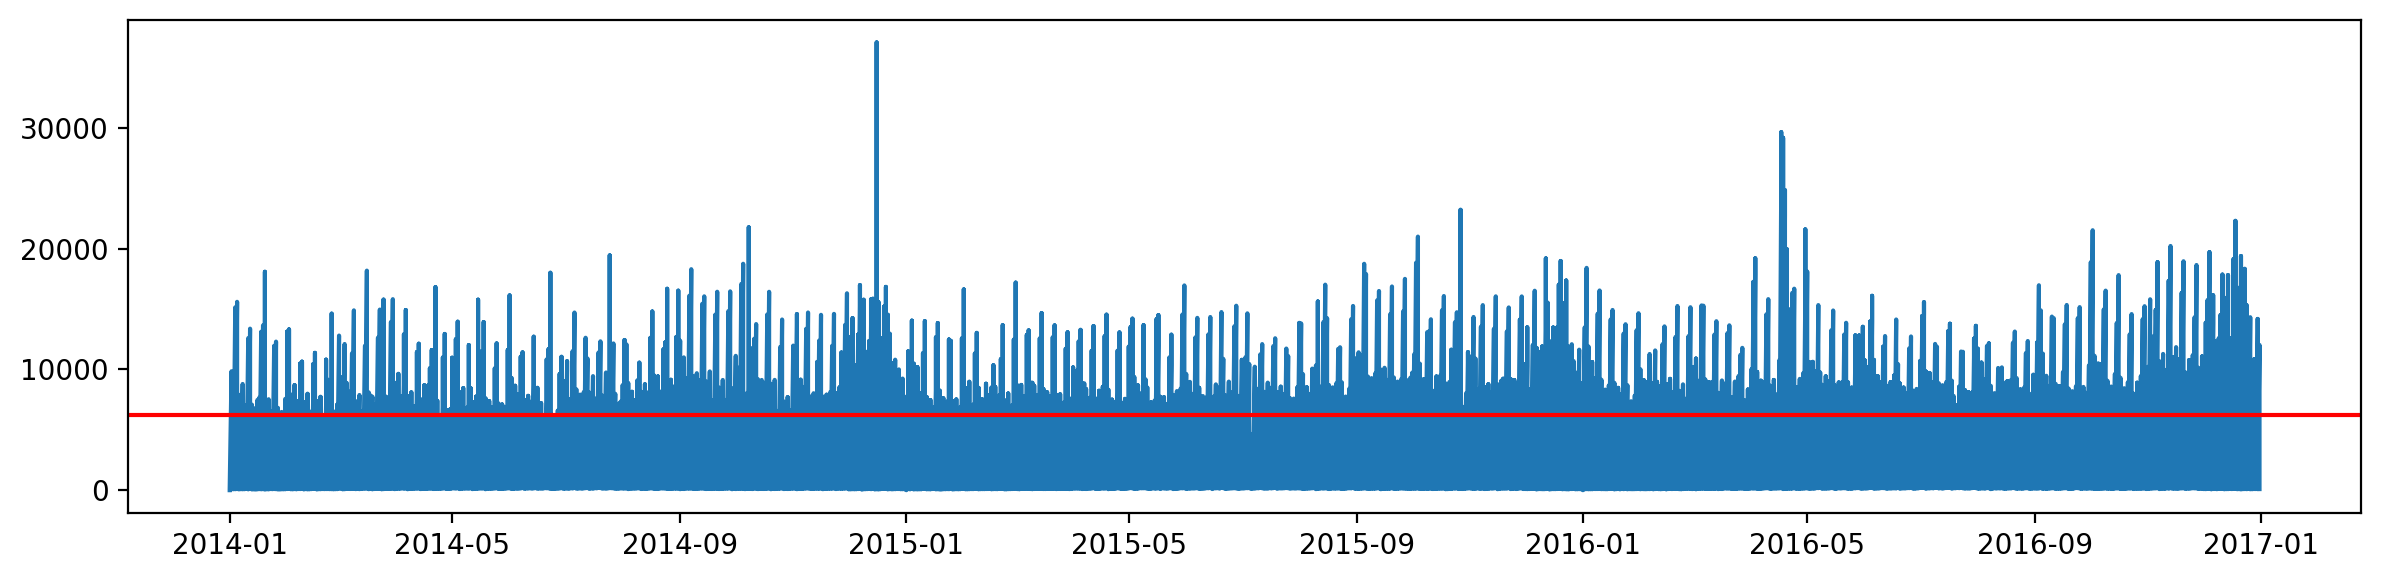

In [14]:
show_trend(sales, 'Qty', '2014-01-01', '2016-12-31')

- 1년간(2016년) 월별 판매량을 확인합니다.

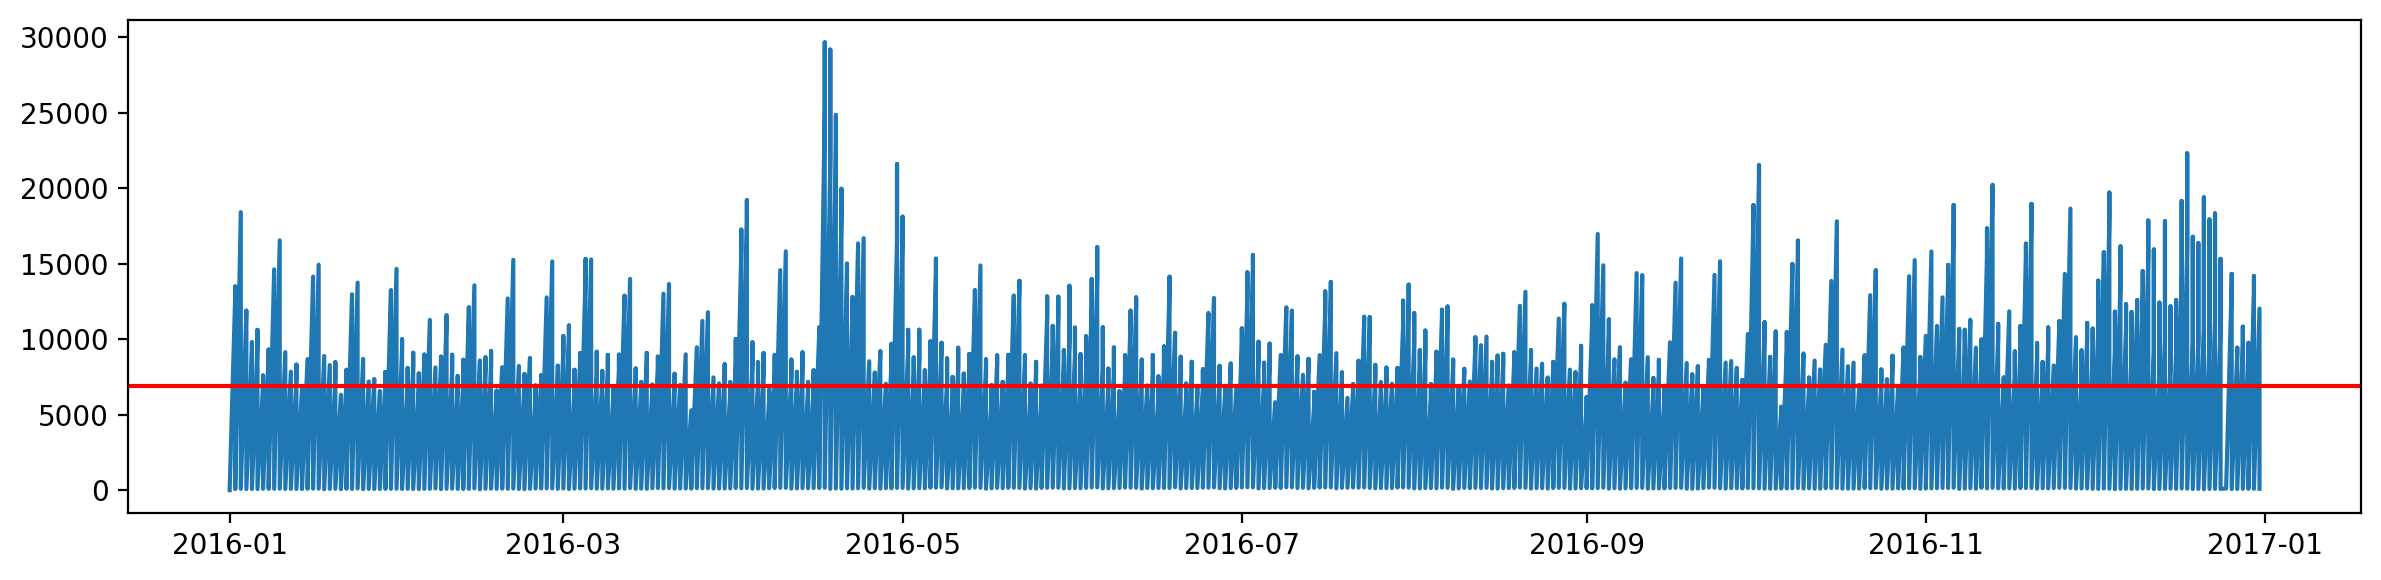

In [15]:
show_trend(sales, 'Qty', '2016-01-01', '2016-12-31')

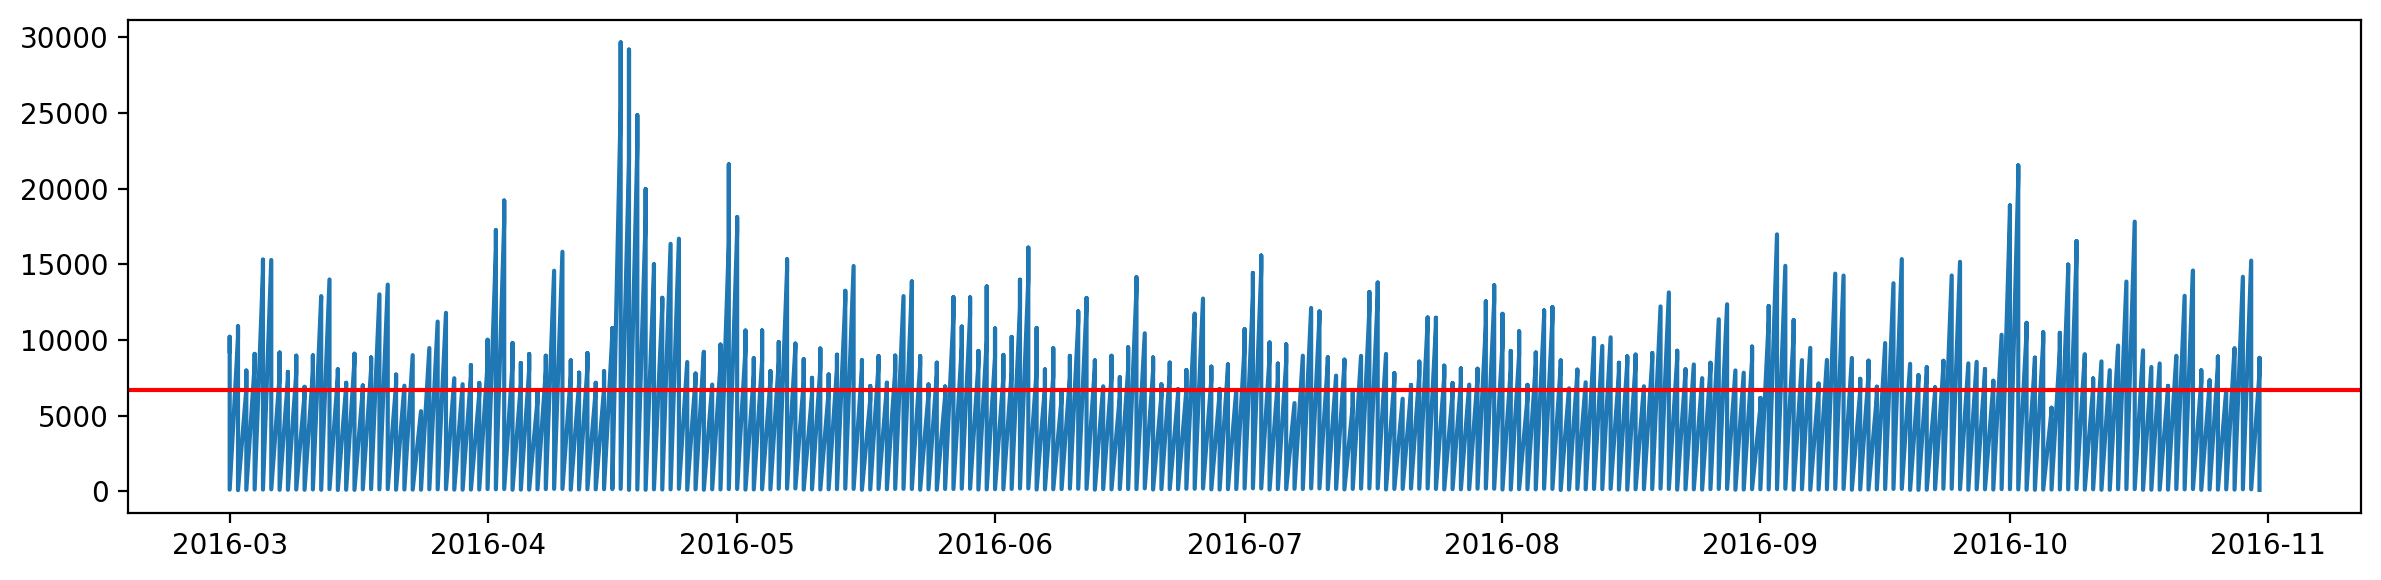

In [16]:
show_trend(sales, 'Qty', '2016-03-01', '2016-10-31')

### **2) 월별 방문 고객수**

- 월별 방문 고객수를 확인합니다.

- 3년간(2014년 ~ 2016년) 월별 고객 방문수를 확인합니다.

In [17]:
filtered_data = sales[(sales['Store_ID'] == 44) & (sales['Product_ID'] == 12)]
data_2014_to_2016 = filtered_data[(filtered_data['Date'].dt.year >= 2014) & (filtered_data['Date'].dt.year <= 2016)]
monthly_sales = data_2014_to_2016.groupby(data_2014_to_2016['Date'].dt.strftime('%Y-%m'))['Qty'].sum()
monthly_sales = monthly_sales.astype(int)
monthly_sales

Date
2014-01    258424
2014-02    234679
2014-03    286898
2014-04    266740
2014-05    273557
2014-06    260157
2014-07    271062
2014-08    304385
2014-09    295769
2014-10    307372
2014-11    296636
2014-12    392794
2015-01    275399
2015-02    247334
2015-03    291310
2015-04    272043
2015-05    294322
2015-06    260040
2015-07    265636
2015-08    299401
2015-09    294239
2015-10    332201
2015-11    310468
2015-12    376872
2016-01    302850
2016-02    273836
2016-03    289269
2016-04    396859
2016-05    319147
2016-06    287695
2016-07    299499
2016-08    287982
2016-09    297606
2016-10    332763
2016-11    365952
2016-12    443578
Name: Qty, dtype: int32

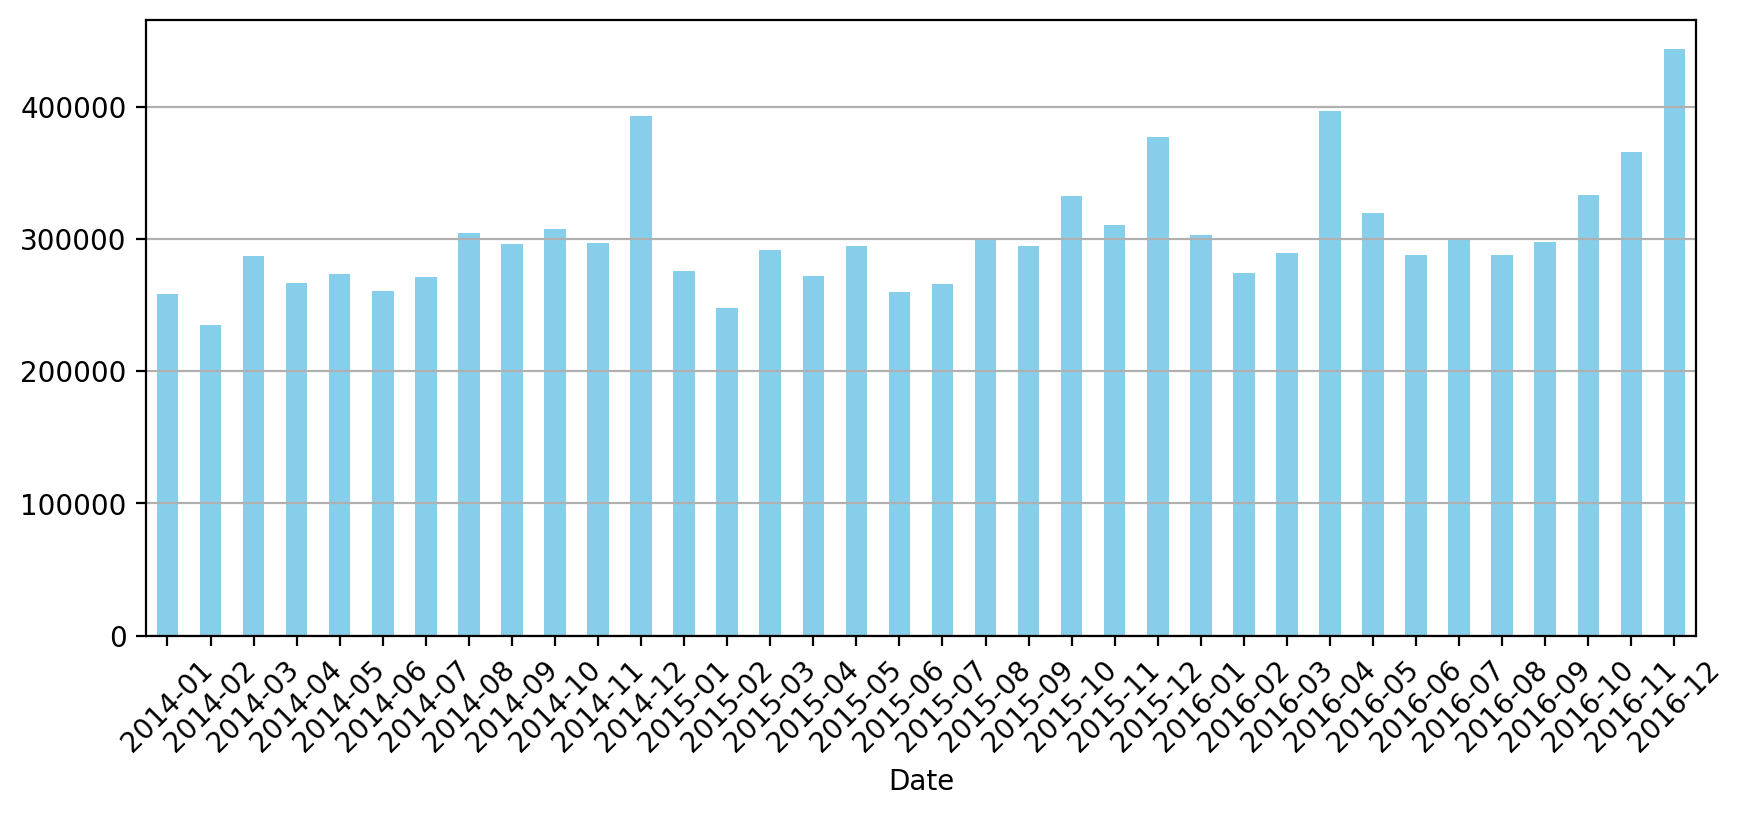

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

- 1년간(2016년) 월별 고객 방문수를 확인합니다.

In [19]:
filtered_data = sales[(sales['Store_ID'] == 44) & (sales['Product_ID'] == 12)]
data_2016 = filtered_data[(filtered_data['Date'].dt.year == 2016)]
monthly_sales_2 = data_2016.groupby(data_2016['Date'].dt.strftime('%Y-%m'))['Qty'].sum()
monthly_sales_2 = monthly_sales_2.astype(int)
monthly_sales_2

Date
2016-01    302850
2016-02    273836
2016-03    289269
2016-04    396859
2016-05    319147
2016-06    287695
2016-07    299499
2016-08    287982
2016-09    297606
2016-10    332763
2016-11    365952
2016-12    443578
Name: Qty, dtype: int32

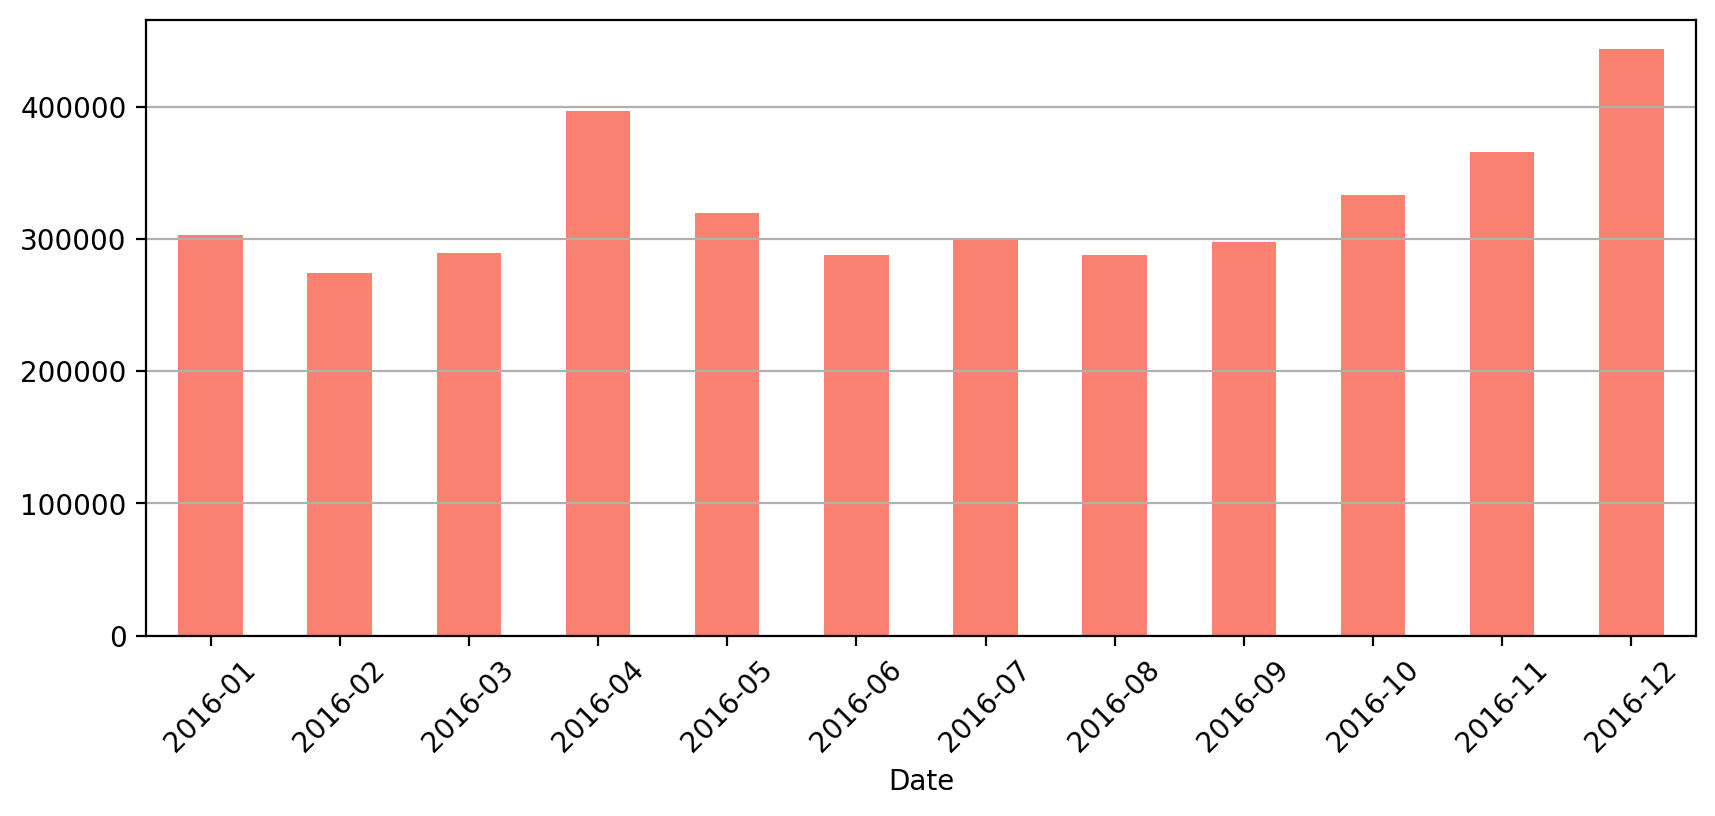

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
monthly_sales_2.plot(kind='bar', color='salmon')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [21]:
def show_maxdate(data, col, start, end='9999-12-31'):
    temp = data.loc[data['Date'].between(start, end)]
    mean_value = temp[col].mean()
    temp = temp[temp[col] >= mean_value]
    top_10 = temp.nlargest(10, col)
    plt.figure(figsize=(12, 3))
    plt.plot(temp['Date'], temp[col])
    plt.scatter(top_10['Date'], top_10[col], color='red', label='Top 10')
    plt.axhline(mean_value, color='r', linestyle='--', label='Mean')
    for date, value in zip(top_10['Date'], top_10[col]):
        plt.text(date, value, f'{date.month}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.legend()
    plt.tight_layout()
    plt.show()

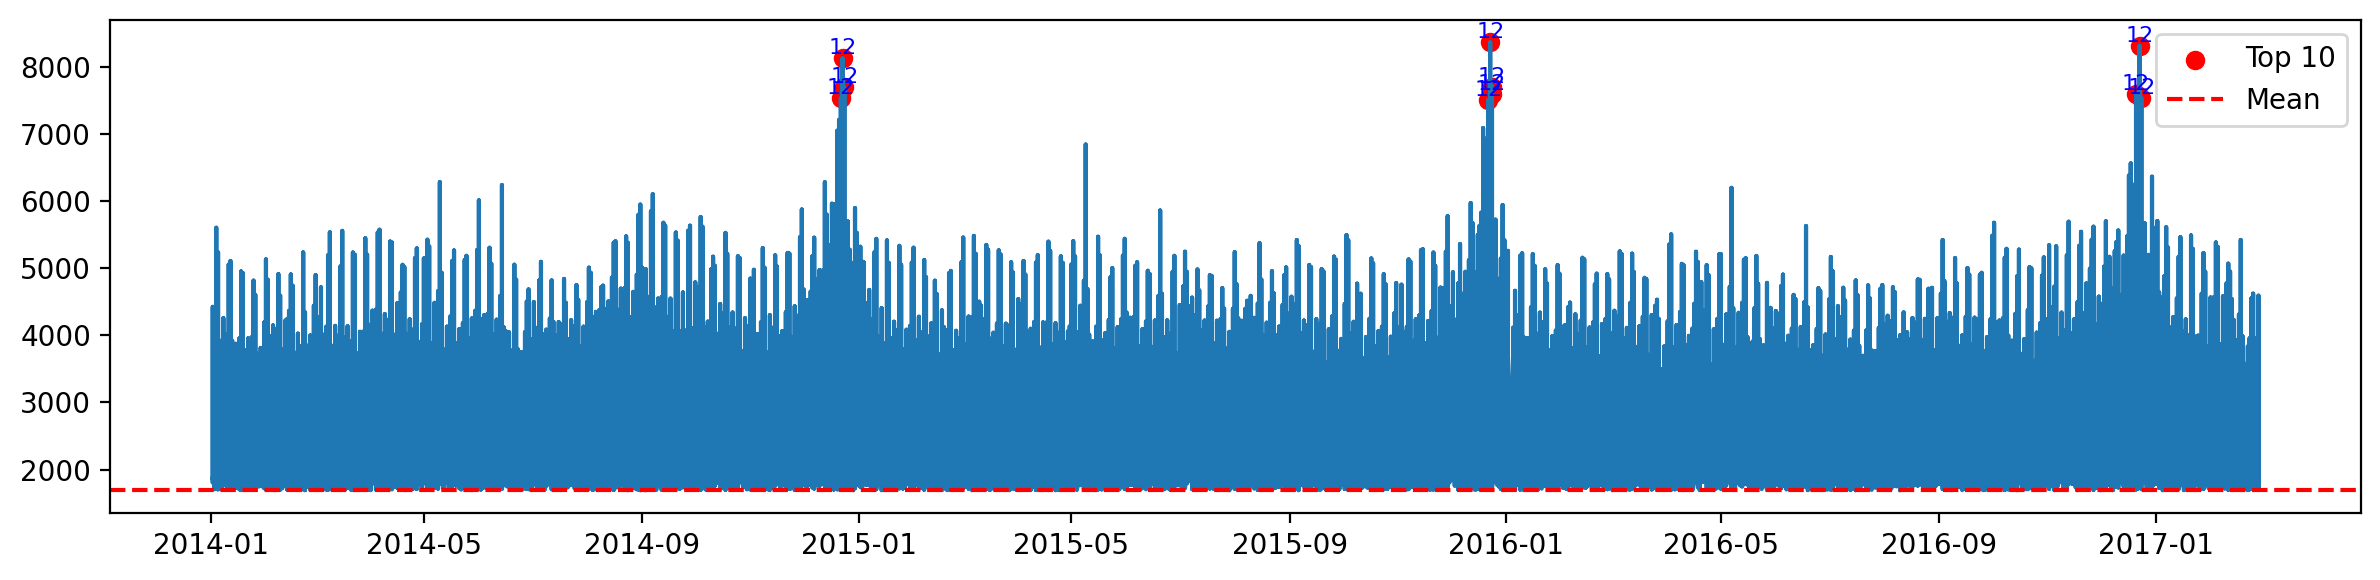

In [22]:
show_maxdate(orders, 'CustomerCount', '2014-01-01')

## **(3) 시계열 패턴 찾아보기 #1**

- 판매량을 선그래프로 시각화해 시계열 패턴을 찾아 봅니다.
- 대상 기간을 변경해 가면서 패턴을 확인해 보길 권고합니다.
- 다음과 같은 시각화가 포함될 수 있습니다.
    - 3년간(2014년~2016년)상품별 판매량 추이
    - 2016년 상품별 판매량 추이
    - 대상 상품과 같은 카테고리의 상품별 판매량 추이
    - 휘발류 가격과 상품 판매량 추이 비교
    - 방문 고객수와 상품 판매량 추이 비교
    - 기타 등등...

In [23]:
def show_trend_line3(data, col, product_id, start, end='9999-12-31'):
    temp = data.loc[(data['Date'].between(start, end)) & (data['Product_ID'] == product_id) & (data['Store_ID'] == 44)]
    temp1 = temp[temp[col] != 0]
    plt.figure(figsize=(15, 3))
    plt.plot(temp['Date'], temp[col], linestyle='-')
    top_10 = temp.nlargest(10, col)
    bottom_10 = temp1.nsmallest(10, col)
    plt.axhline(temp[col].mean(), color='r', linestyle='--', label='Mean')
    plt.scatter(top_10['Date'], top_10[col], color='red', label='Top 10')
    plt.scatter(bottom_10['Date'], bottom_10[col], color='blue', label='Bottom 10')
    for date, value in zip(top_10['Date'], top_10[col]):
        plt.text(date, value, f'{date.month}', ha='center', va='bottom', fontsize=8, color='red')
    for date, value in zip(bottom_10['Date'], bottom_10[col]):
        plt.text(date, value, f'{date.month}', ha='center', va='top', fontsize=8, color='blue')
    plt.legend()
    plt.tight_layout()
    plt.show()

### **1) 상품별 판매량 추이**

- 대상 상품의 판매량 추이를 선그래프로 시각화해 확인합니다.

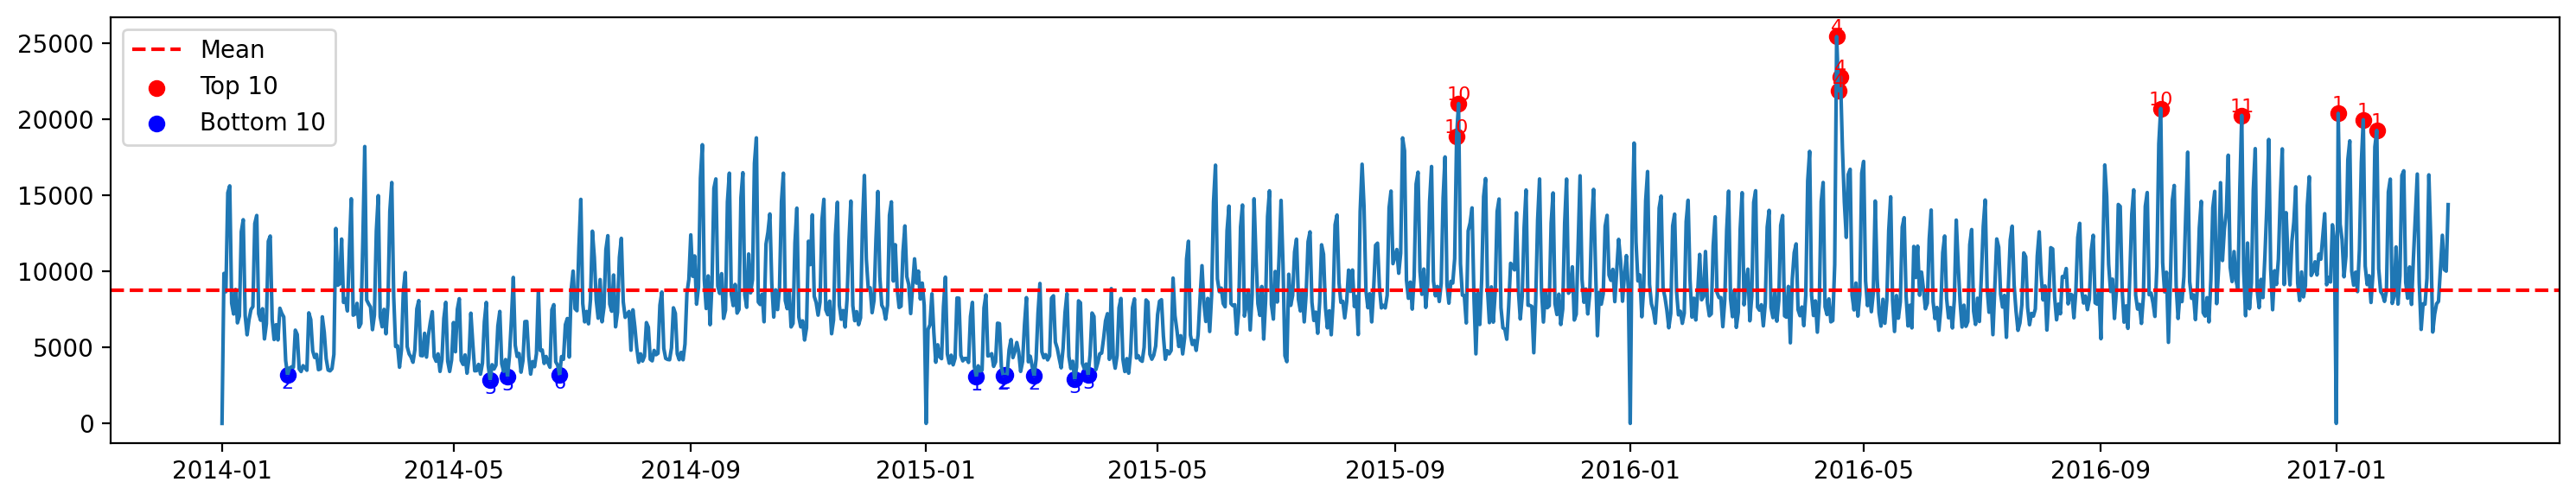

In [24]:
show_trend_line3(sales,'Qty',3,'2014-01-01','2024-12-31')

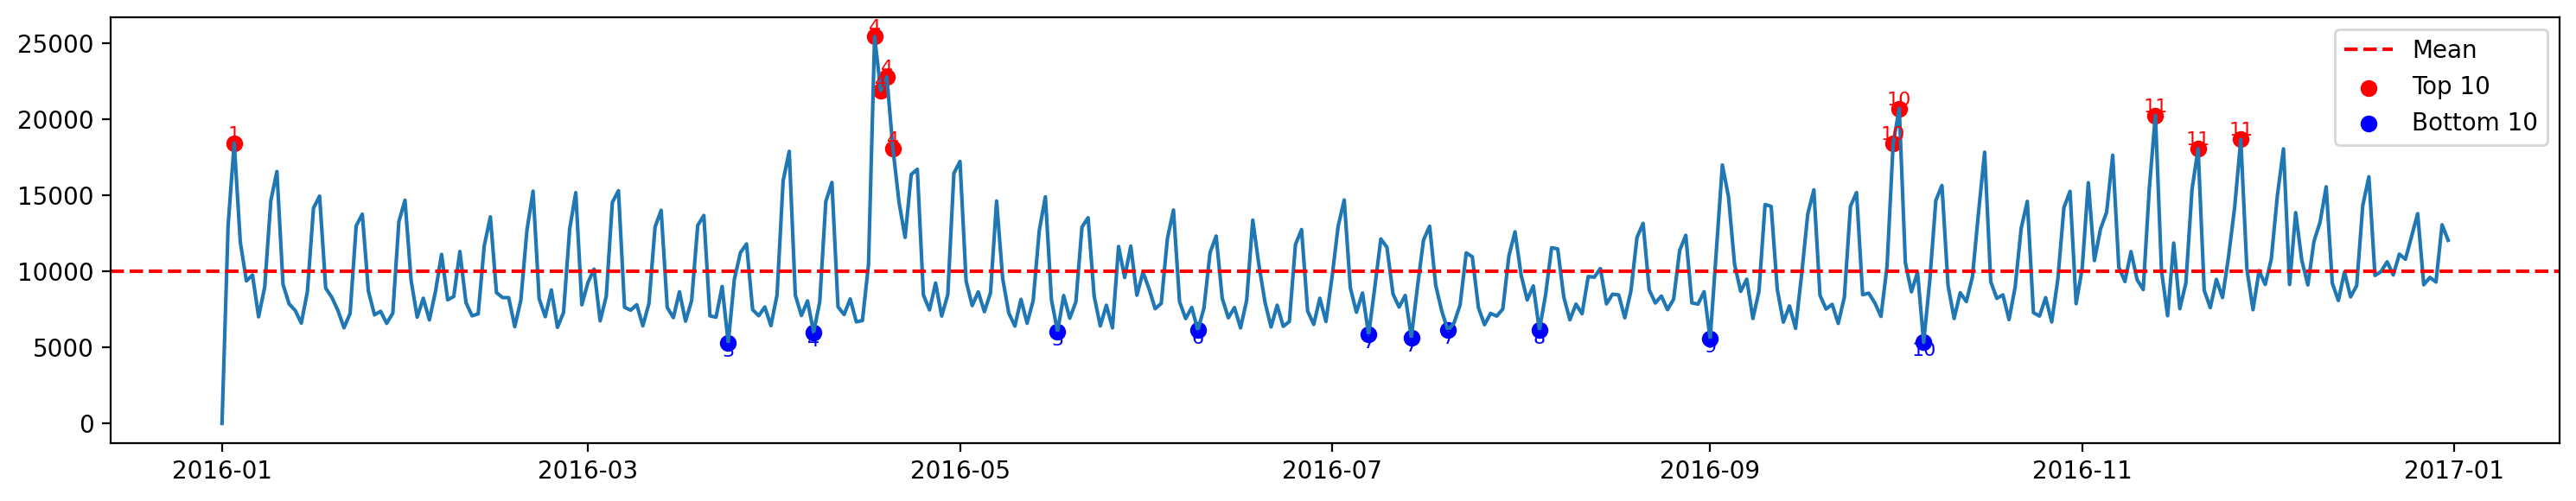

In [25]:
show_trend_line3(sales,'Qty',3,'2016-01-01','2016-12-31')

### **2) 대상 상품과 같은 카테고리의 상품별 판매량 추이**

- 대상 상품과 같은 카테고리에 포함된 상품 판매량을 집계해 판매량 추이를 선그래프로 시각화해 확인합니다.

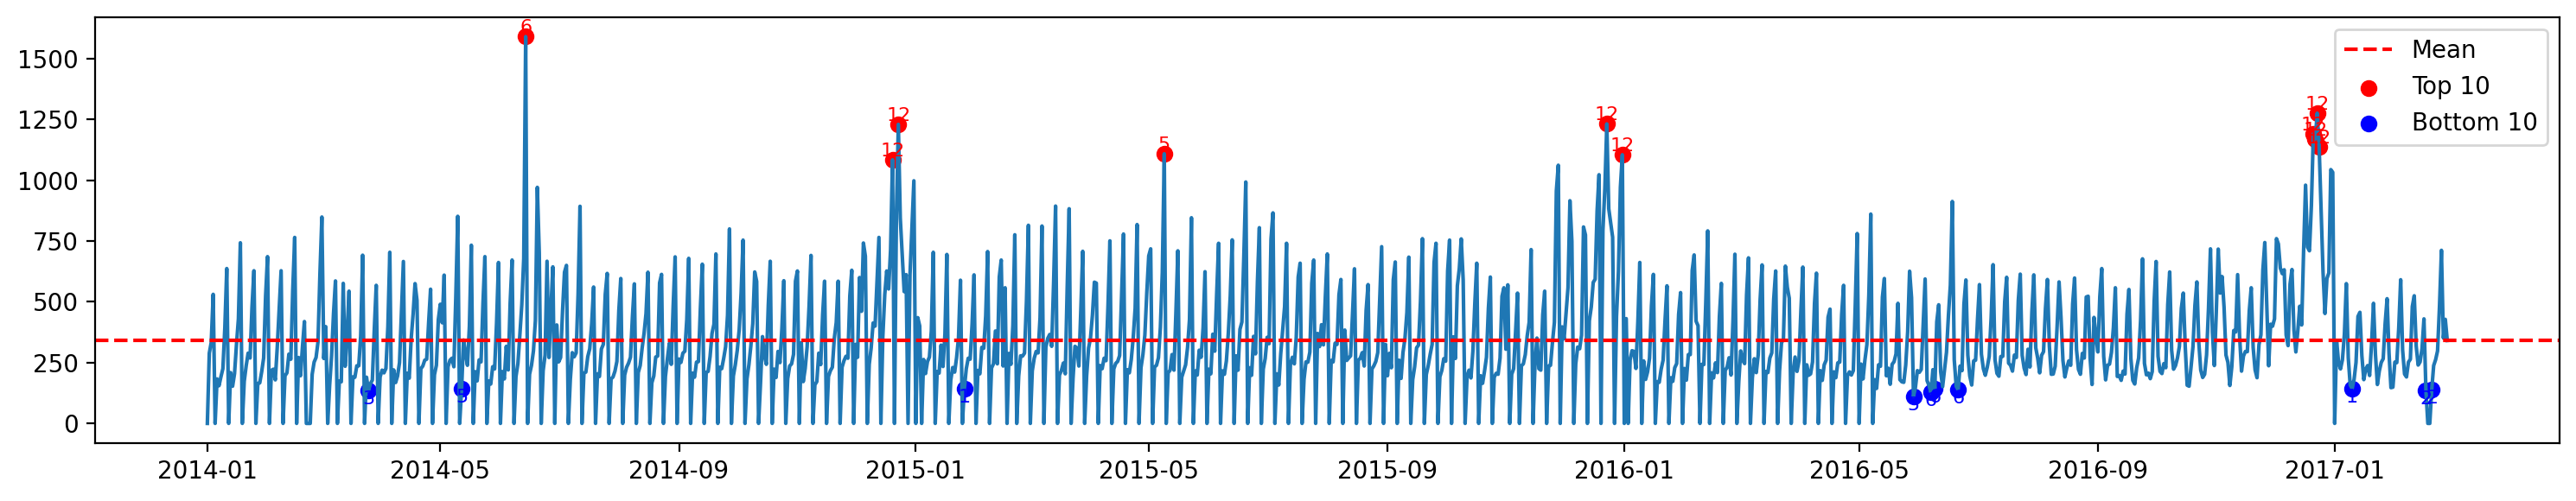

In [26]:
show_trend_line3(sales,'Qty',38,'2014-01-01','2024-12-31')

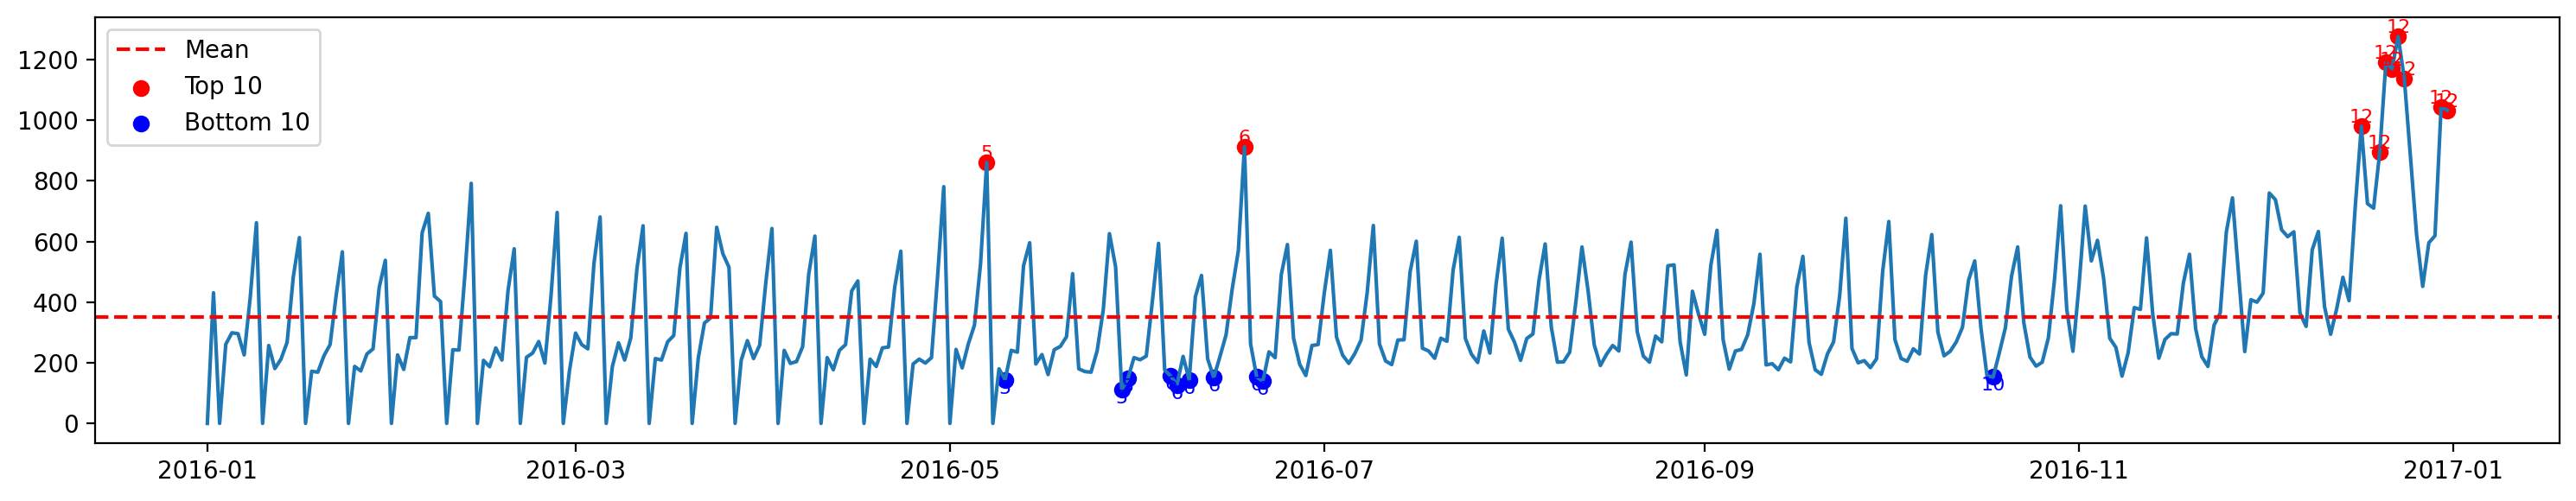

In [27]:
show_trend_line3(sales,'Qty',38,'2016-01-01','2016-12-31')

### **3) 휘발유 가격과 상품 판매량 추이 비교**

- 휘발유 가격 추이와 대상 상품 판매량 추이를 선그래프로 시각화해 비교합니다.

In [50]:
def show_trend(col, start, end='9999-12-31', data=data):
    temp = data.loc[data['Date'].between(start, end)]
    plt.figure(figsize=(12, 3))
    plt.plot('Date', col, data=temp)
    plt.tight_layout()
    plt.show()

In [48]:
data = pd.merge(sales, oil_price)
data.dropna(inplace=True)

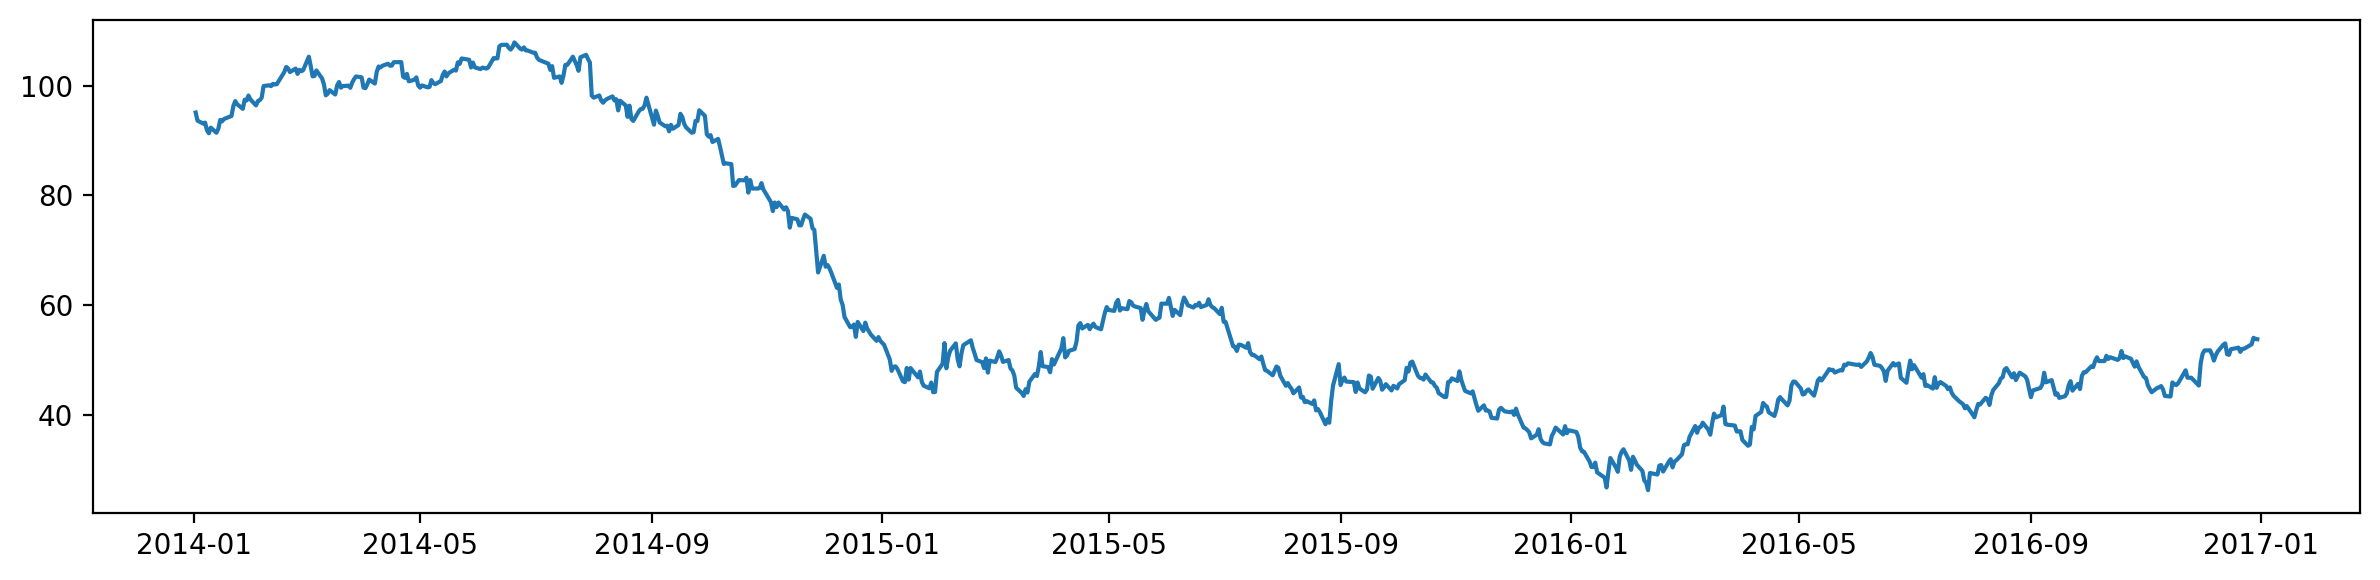

In [51]:
show_trend('WTI_Price', '2014-01-01', '2016-12-31', data)

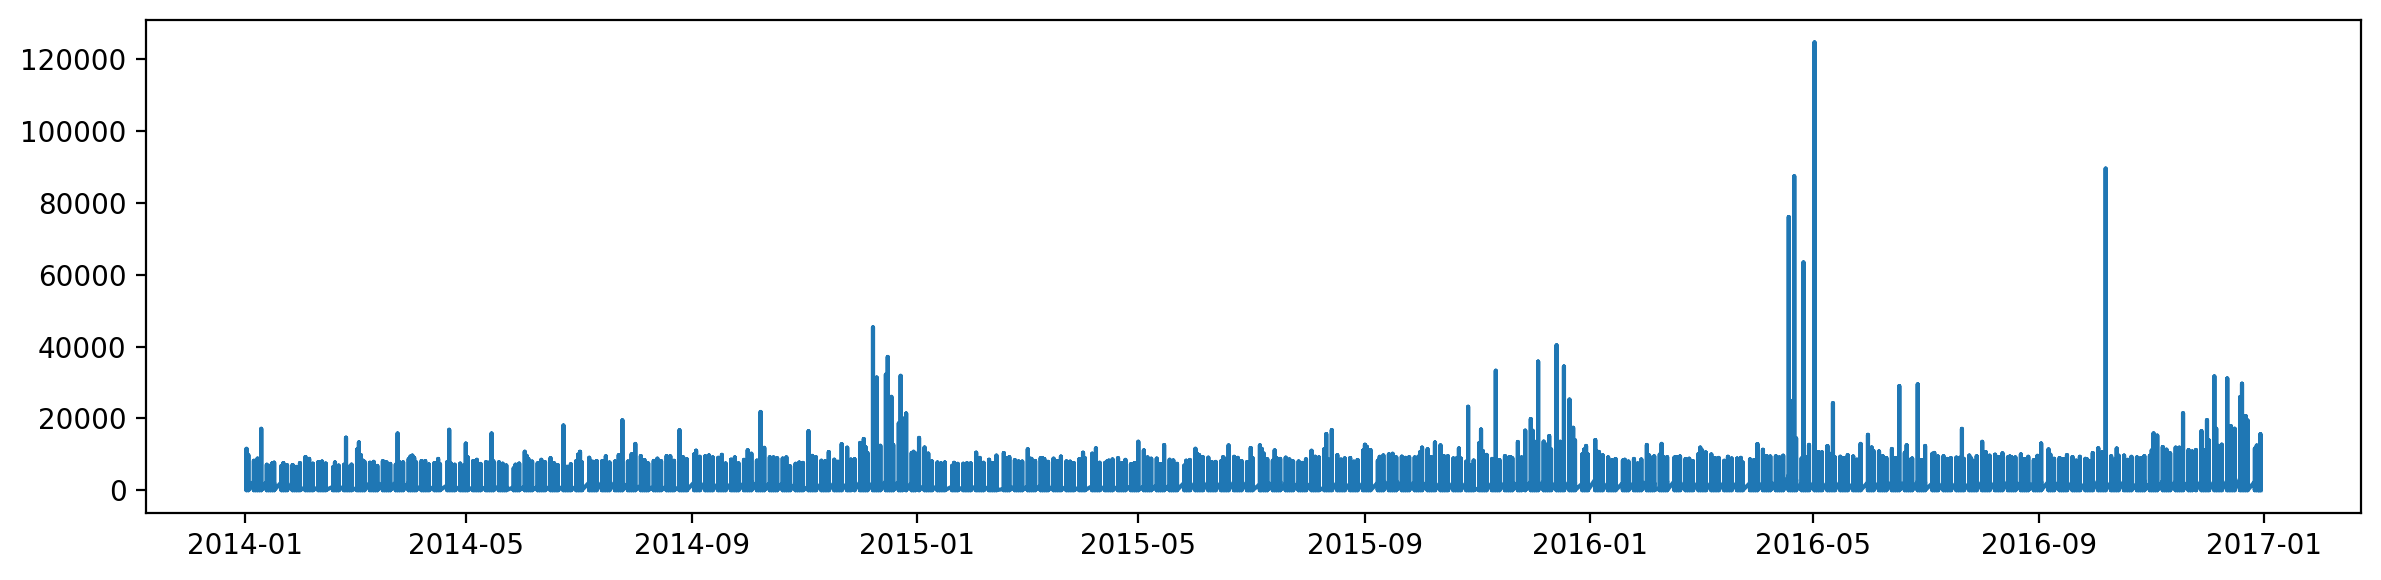

In [52]:
show_trend('Qty', '2014-01-01', '2016-12-31', data)

### **4) 14일 동안 휘발유 가격 평균과 상품 판매량 추이 비교**

- 일별 휘발유 가격 변동보다는 최근 14일 동안의 휘발유 가격 평균값의 추이와 비교합니다.

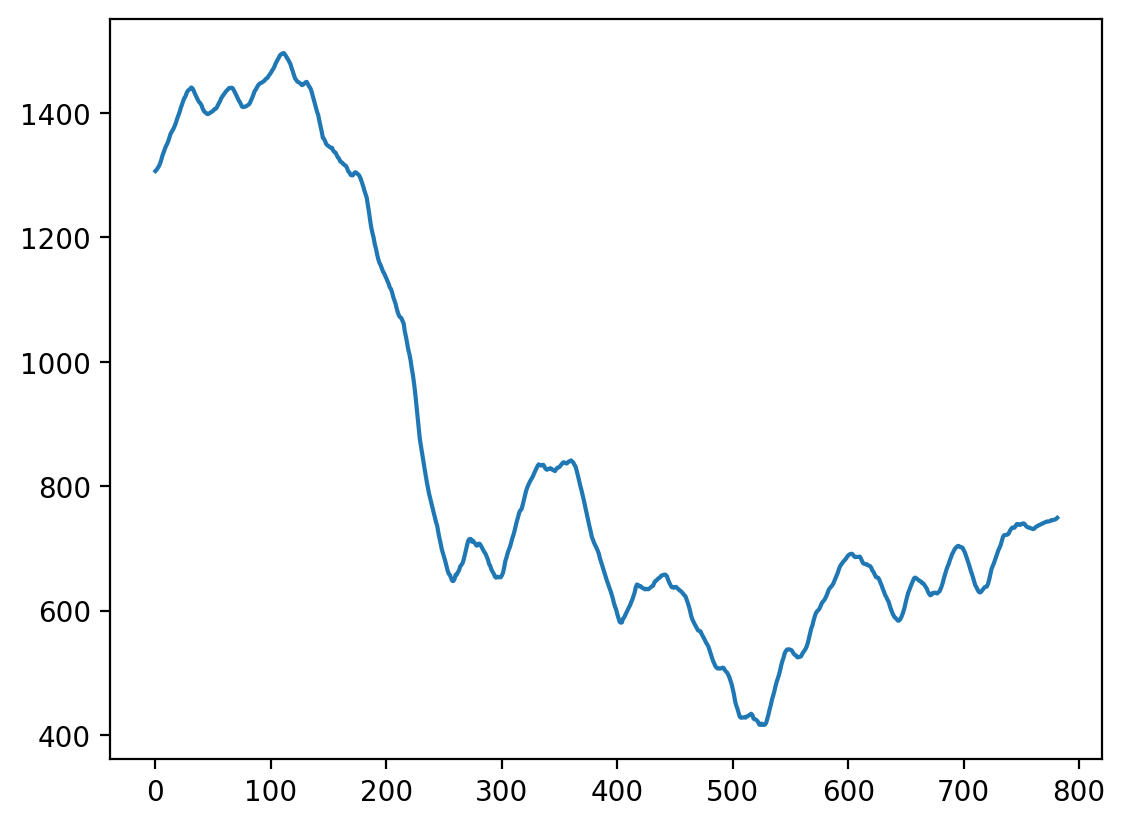

In [47]:
oil_price2 = oil_price.dropna()
temp = pd.DataFrame()
for x in range(0, 14):
    temp[f'Temp_Lag_{x}'] = oil_price2['WTI_Price'].shift(x)
temp.dropna(inplace=True)

temp.reset_index(drop=True, inplace=True)
temp['14_sum'] = temp.sum(axis=1)
temp

plt.plot(temp['14_sum'])
plt.show()

### **5) 방문 고객수와 상품 판매량 추이 비교**

- 방문 고객수 추이와 대상 상품 판매량 추이를 선그래프로 시각화해 비교합니다.

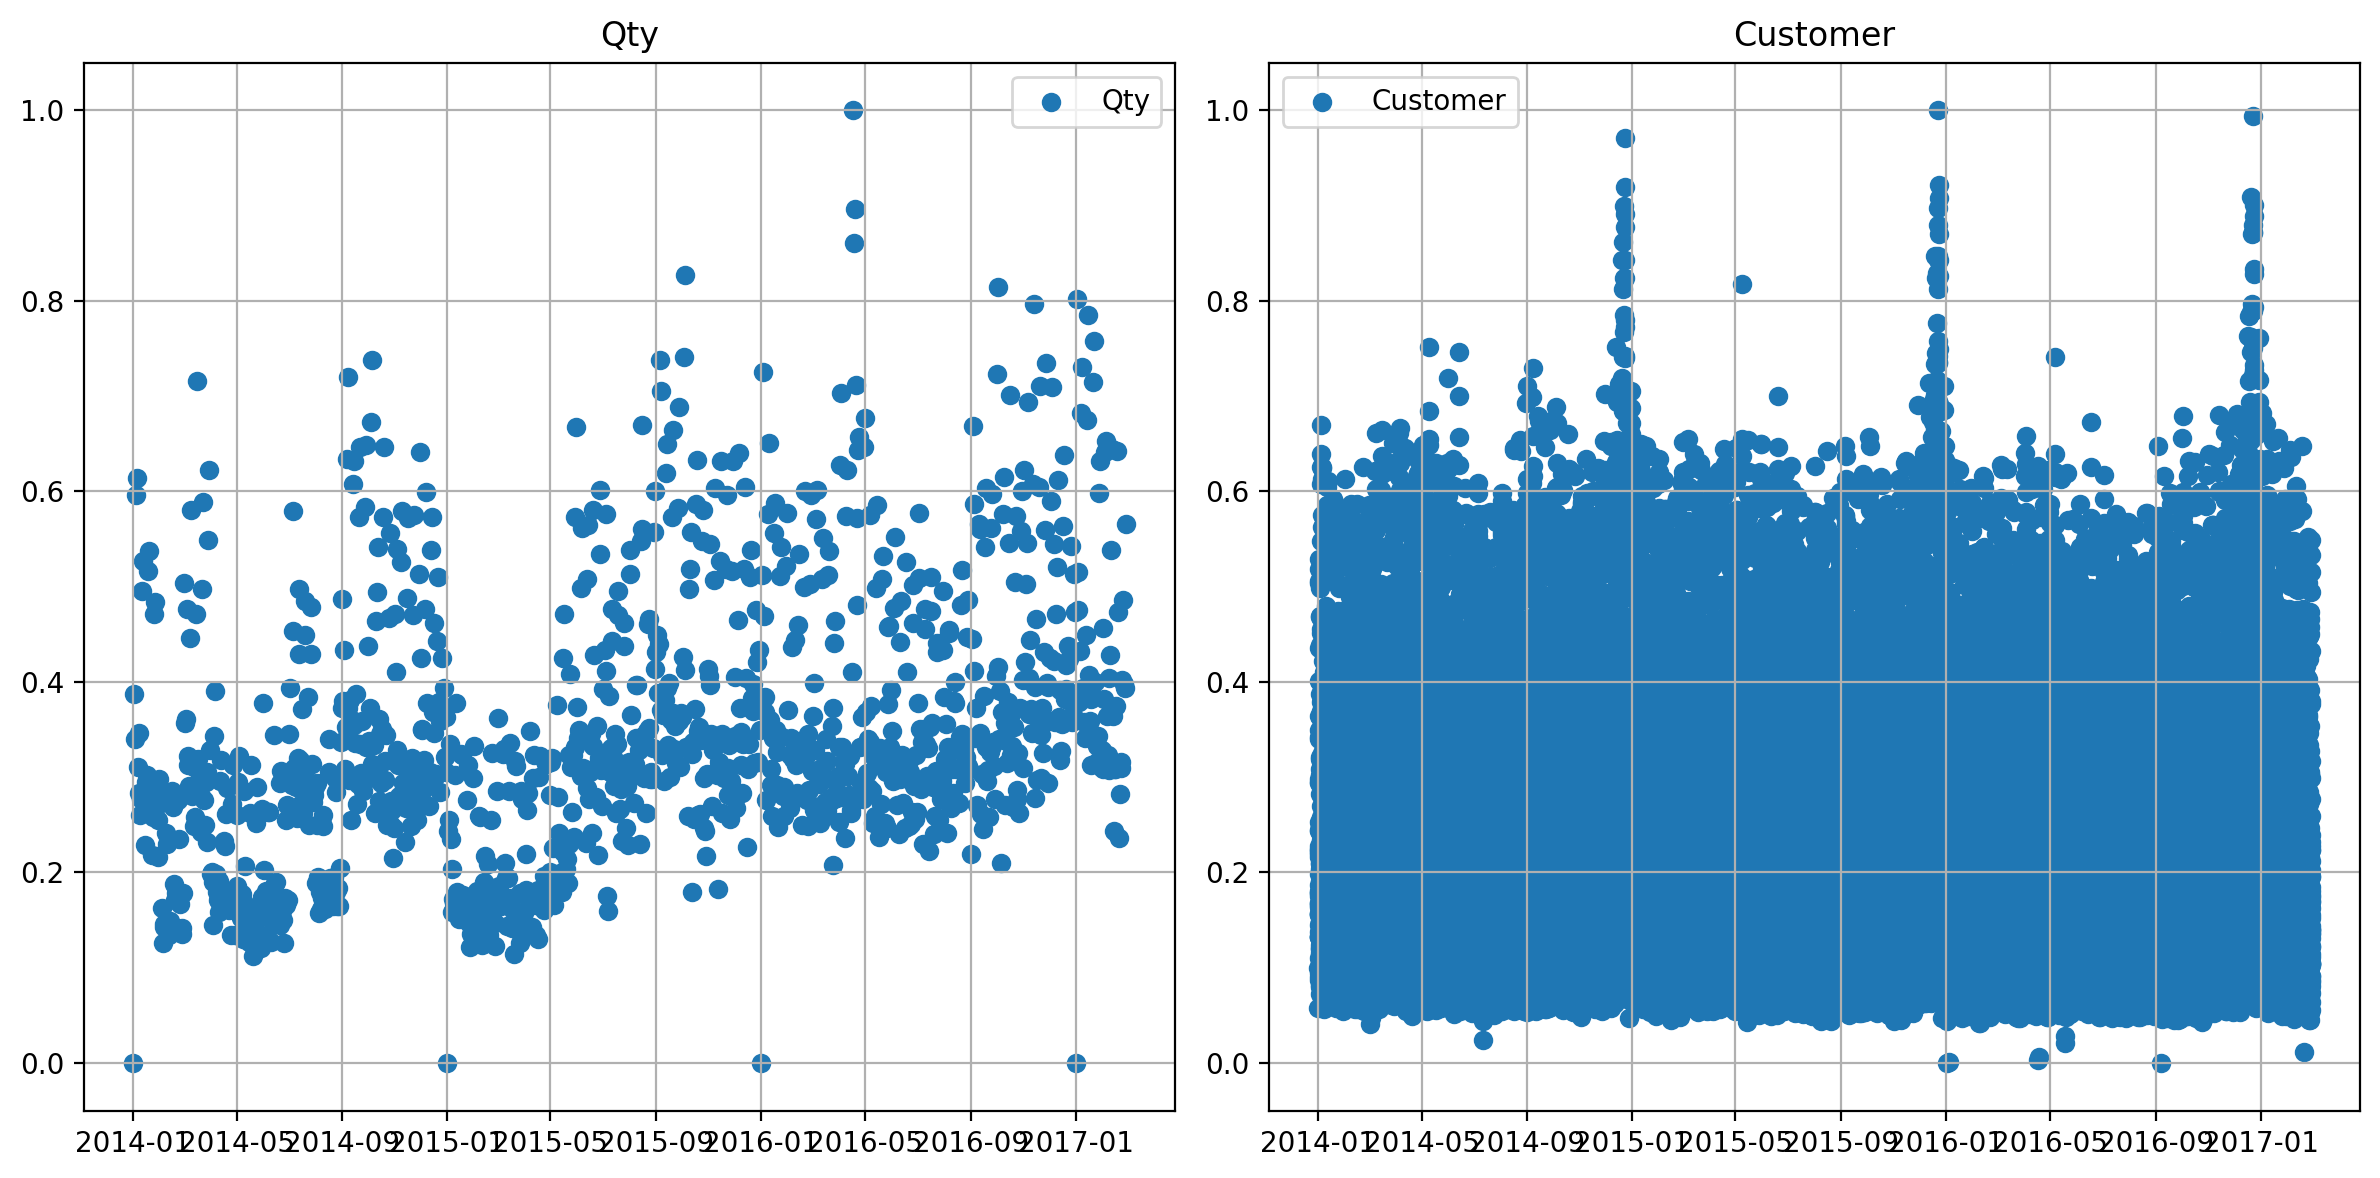

In [40]:
scaler = MinMaxScaler()
scaled_qty = scaler.fit_transform(filtered_sales['Qty'].values.reshape(-1, 1))
scaled_customer_count = scaler.fit_transform(orders['CustomerCount'].values.reshape(-1, 1))


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(filtered_sales['Date'], scaled_qty, marker='o', label='Qty')
plt.title('Qty')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(orders['Date'], scaled_customer_count, marker='o', label='Customer')
plt.title('Customer')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
sales[sales['Product_ID'] == 3]['Store_ID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

## **(4) 시계열 패턴 찾아보기 #2**

- 상품별 판매량의 변화량을 비교합니다.
- **df['변수'].diff()** 형태로 변수에 대한 변화량을 확인할 수 있습니다.
- 변화량을 선그래프로 시각화하거나, 변화량의 분포를 히스토그램으로 시각화할 수 있습니다.

### **1) 상품별 변화량 비교**

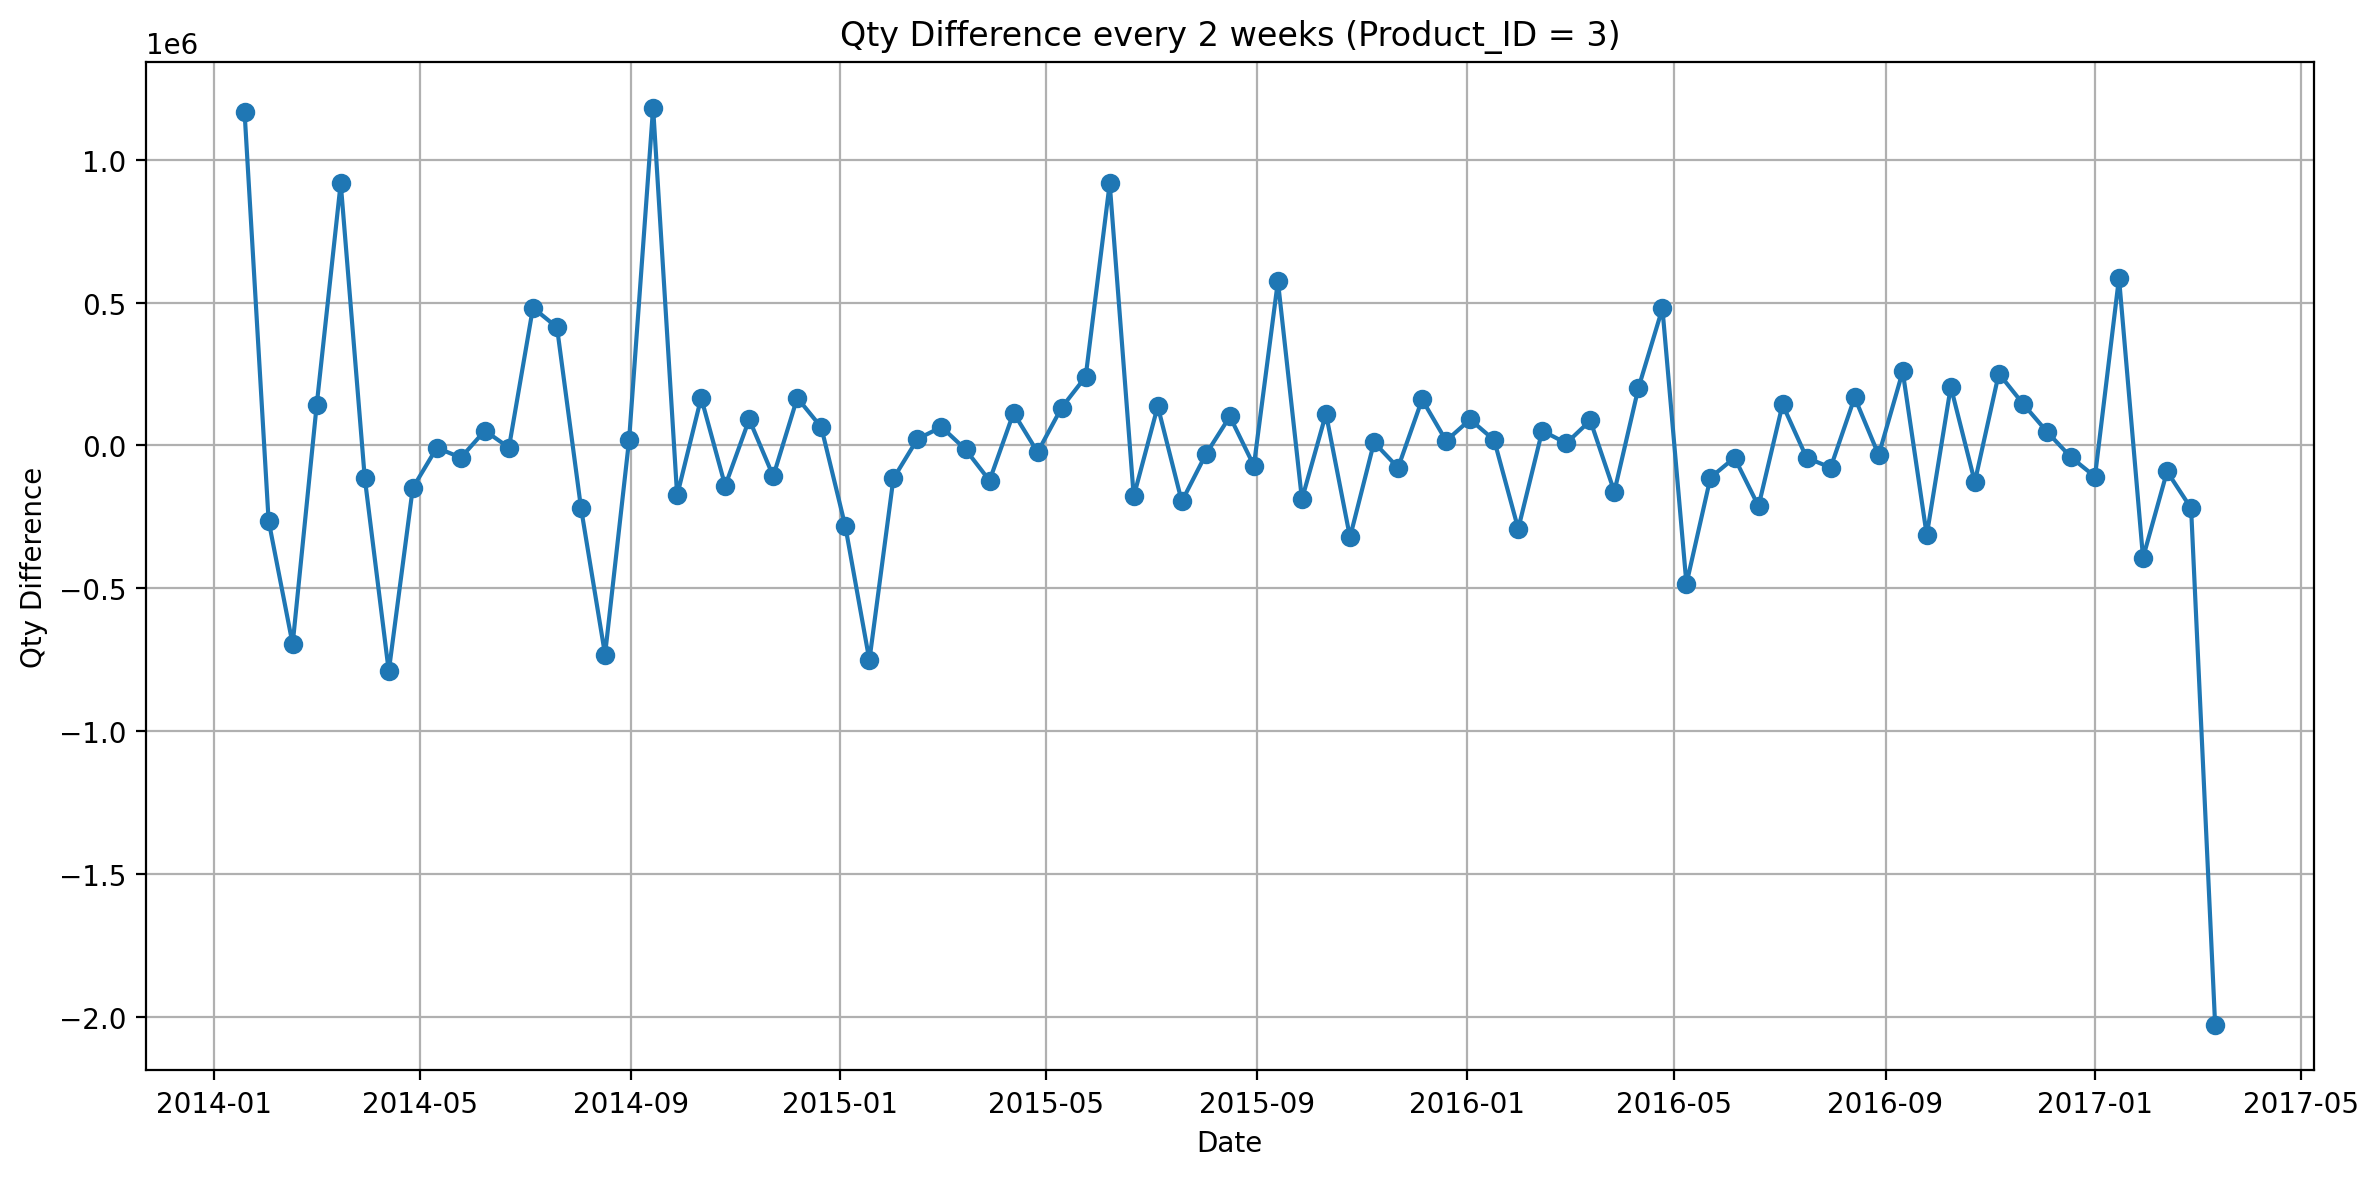

In [42]:
sales_product_3 = sales[sales['Product_ID'] == 3]
sales_product_3_2weeks = sales_product_3.groupby(pd.Grouper(key='Date', freq='2W')).sum()
sales_product_3_2weeks['CountDiff'] = sales_product_3_2weeks['Qty'].diff()
plt.figure(figsize=(12, 6))
plt.plot(sales_product_3_2weeks.index, sales_product_3_2weeks['CountDiff'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Qty Difference')
plt.title('Qty Difference every 2 weeks (Product_ID = 3)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **2) 요일별 변화량 비교**

- 요일별 판매량과 변화량을 막대그래프로 시각화해 비교합니다.
- 요일은 **df['Weekday'] = df['Date'].dt.weekday** 형태로 얻을 수 있습니다.
- Seaborn의 **sns.barplot()** 을 사용하면 자동 집계되어 시각화되니 편리합니다.

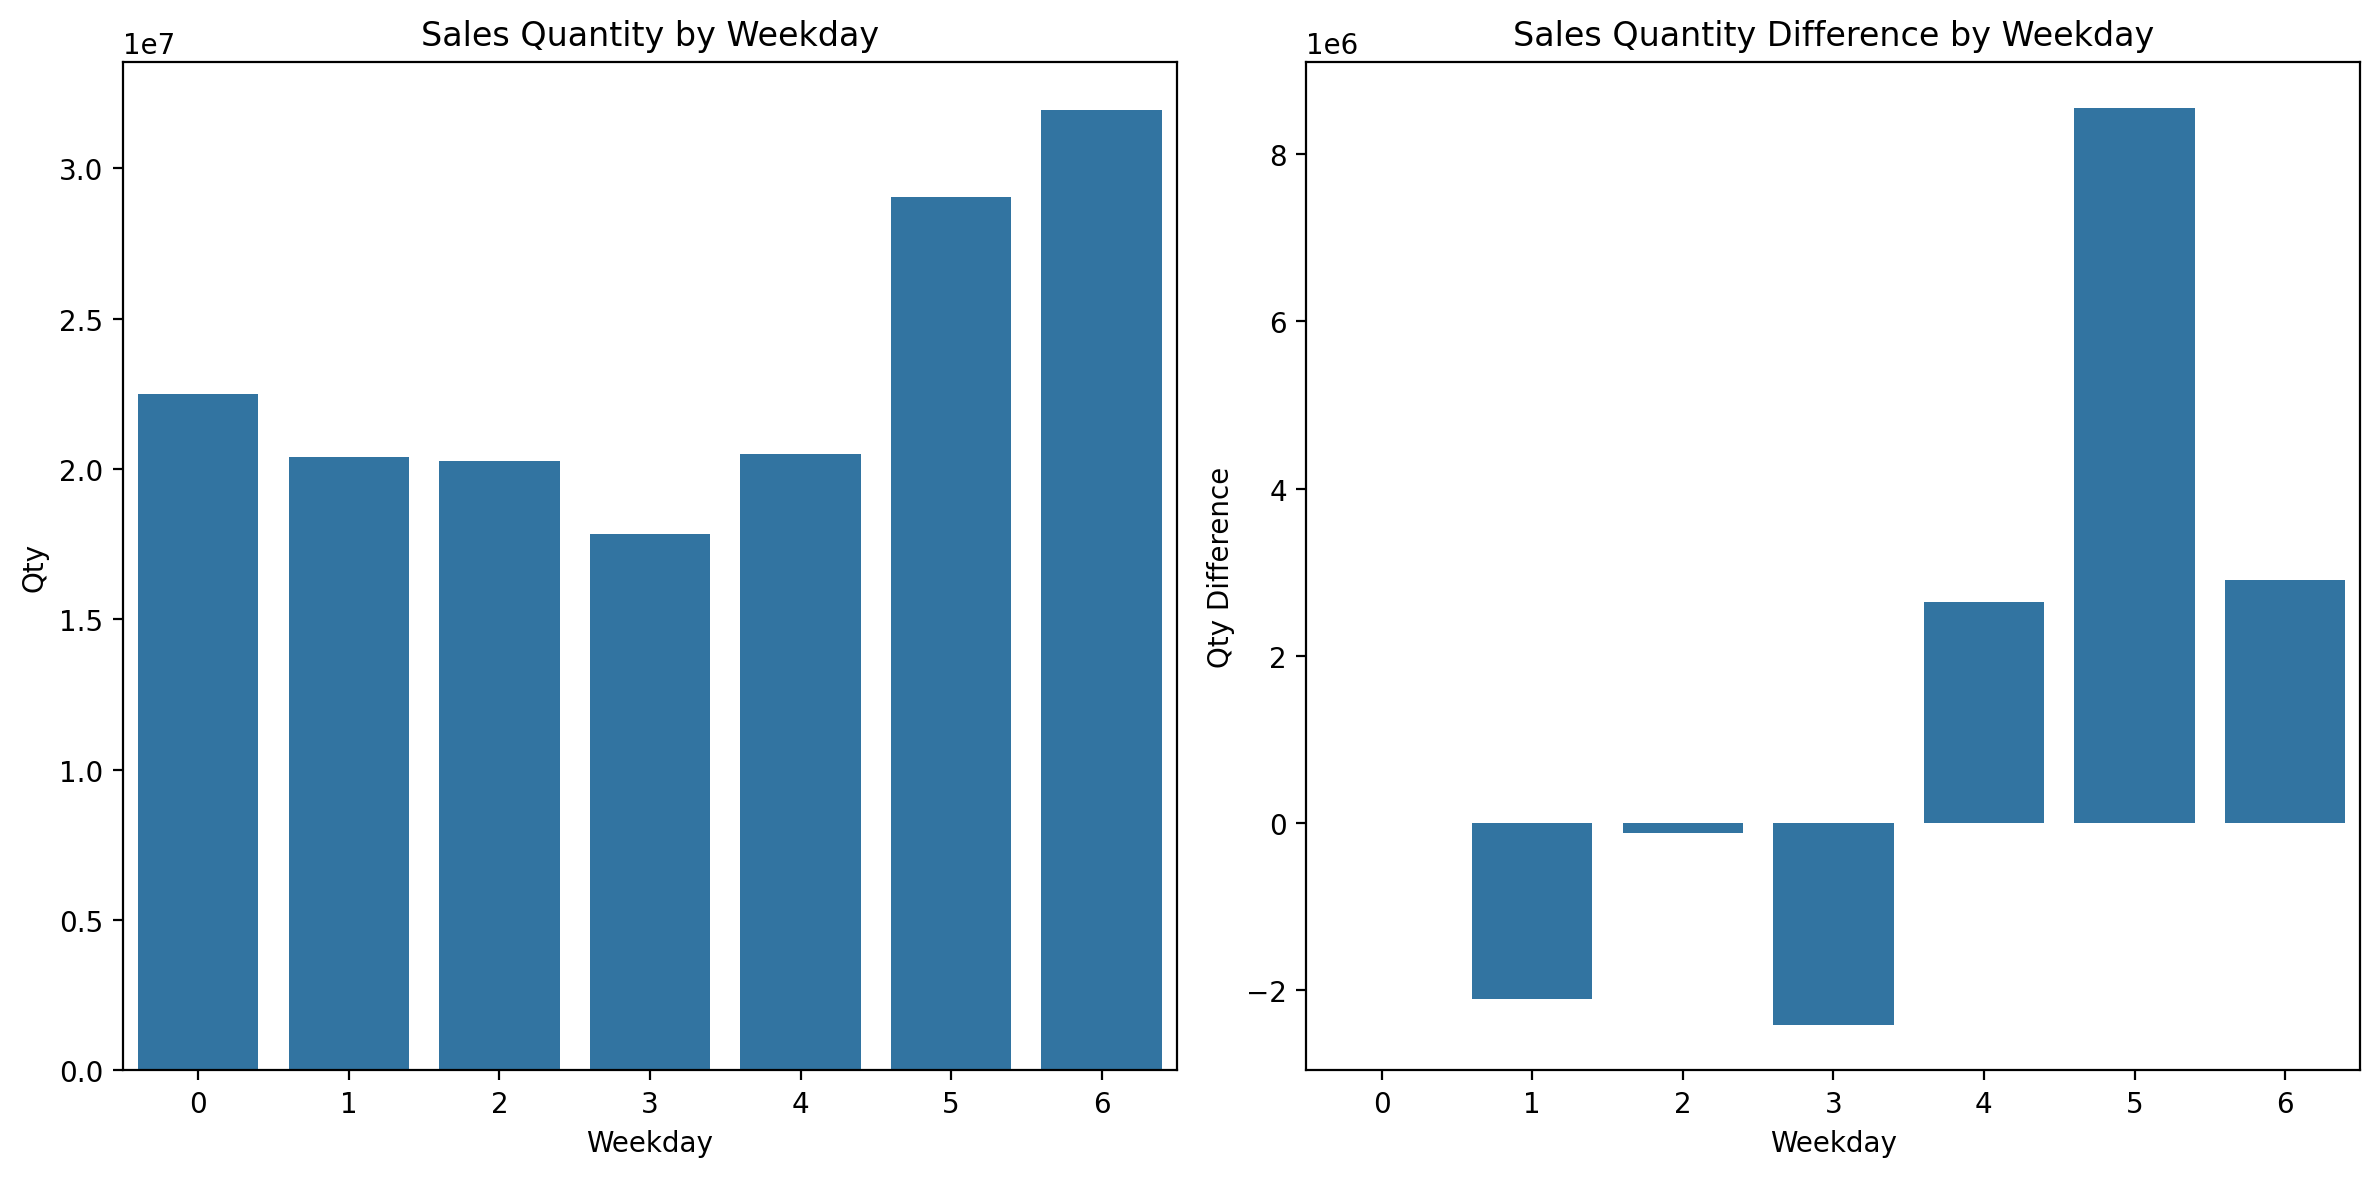

In [43]:
sales_product_3['Weekday'] = sales_product_3['Date'].dt.weekday

sales_by_weekday = sales_product_3.groupby('Weekday')['Qty'].sum().reset_index()

sales_by_weekday['QtyDiff'] = sales_by_weekday['Qty'].diff()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Weekday', y='Qty', data=sales_by_weekday)
plt.xlabel('Weekday')
plt.ylabel('Qty')
plt.title('Sales Quantity by Weekday')

plt.subplot(1, 2, 2)
sns.barplot(x='Weekday', y='QtyDiff', data=sales_by_weekday)
plt.xlabel('Weekday')
plt.ylabel('Qty Difference')
plt.title('Sales Quantity Difference by Weekday')

plt.tight_layout()
plt.show()

### **3) 시계열 데이터 분해**

- 다음과 같은 형태로 시계열 데이터를 분해할 수 있습니다.

~~~
decomp = sm.tsa.seasonal_decompose(temp['변수'], model='additive', period=7
~~~

- 분해 결과를 decomp 변수에 저장했으면 다음과 같이 데이터프레임을 만들어 시각화 할 수 있습니다.

~~~
result = pd.DataFrame({'observed':decomp.observed,
                       'trend':decomp.trend,
                       'seasonal':decomp.seasonal,
                       'residual':decomp.resid})
~~~

In [30]:
# 함수 만들기
def decomp_plot(Product_ID, sdate, edate, period):
    # 시계열 데이터 분해
    temp = sales.loc[(sales['Store_ID']==44) & (sales['Product_ID']==Product_ID) & (sales['Date'].between(sdate, edate))]
    temp.reset_index(drop=True, inplace=True)
    decomp = sm.tsa.seasonal_decompose(temp['Qty'], model='additive', period=period)

    # 시계열 분해 결과를 받아서 데이터프레임으로 저장
    result = pd.DataFrame({'observed':decomp.observed,
                           'trend':decomp.trend,
                           'seasonal':decomp.seasonal,
                           'residual':decomp.resid})

    # 4개의 그래프로 나눠서 그리기
    plt.figure(figsize=(12, 8))
    # observed
    plt.subplot(4, 1, 1)
    plt.plot(result['observed'])
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.title('Time Series Decomposition', size=15)
    plt.ylabel('observed')
    # trend
    plt.subplot(4, 1, 2)
    plt.plot(result['trend'])
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.ylabel('trend')
    # seasonal
    plt.subplot(4, 1, 3)
    plt.plot(result['seasonal'])
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.ylabel('seasonal')
    # residual
    plt.subplot(4,1,4)
    plt.plot(result['residual'])
    plt.ylabel('residual')
    plt.tight_layout()
    plt.show()
    return result

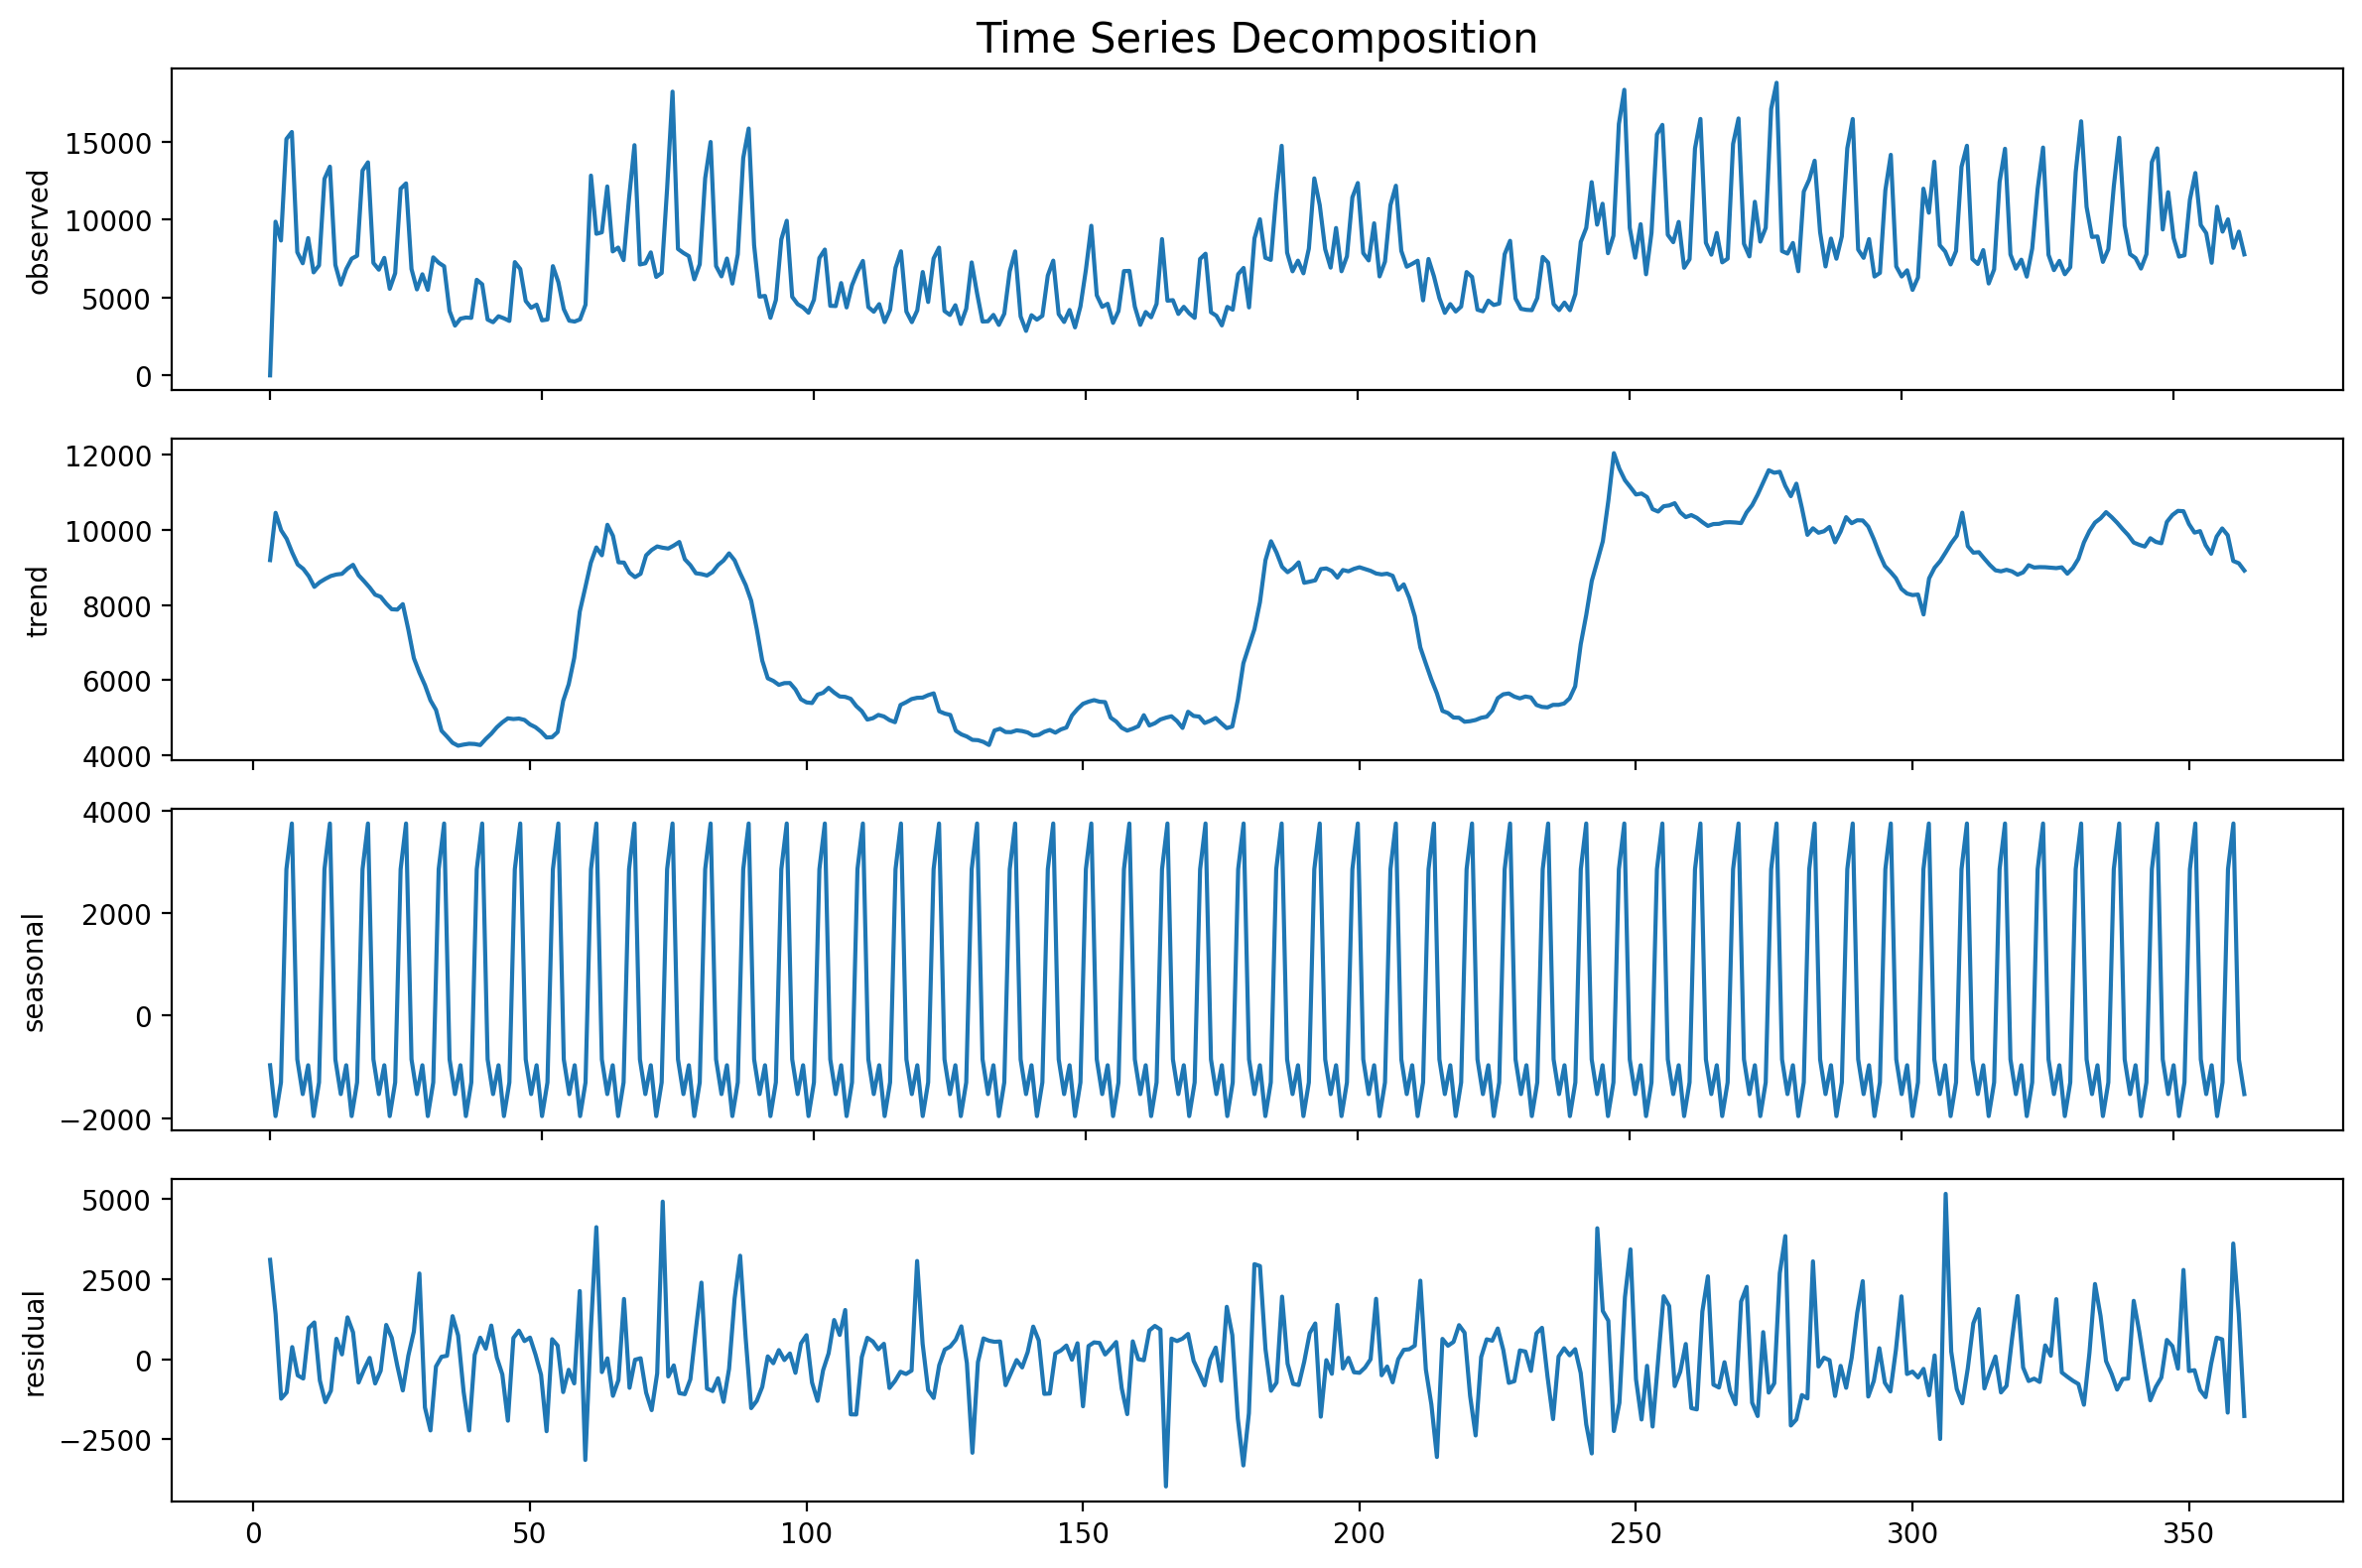

,observed,trend,seasonal,residual
0,0.0,NaN,-969.140826,NaN
1,9853.0,NaN,-1962.731862,NaN
2,8647.0,NaN,-1303.953150,NaN
3,15153.0,9192.428571,2863.351956,3097.219472
4,15606.0,10449.571429,3757.839567,1398.589005
...,...,...,...,...
359,9216.0,9109.000000,-1303.953150,1410.953150
360,10006.0,8914.714286,2863.351956,-1772.066242
361,8173.0,NaN,3757.839567,NaN
362,9218.0,NaN,-853.023179,NaN


In [31]:
decomp_plot(3,'2014-01-01','2014-12-31',7)

### **4) 그 외 패턴 찾아보기**

### **농수산 제품 계절별 판매량 추이**

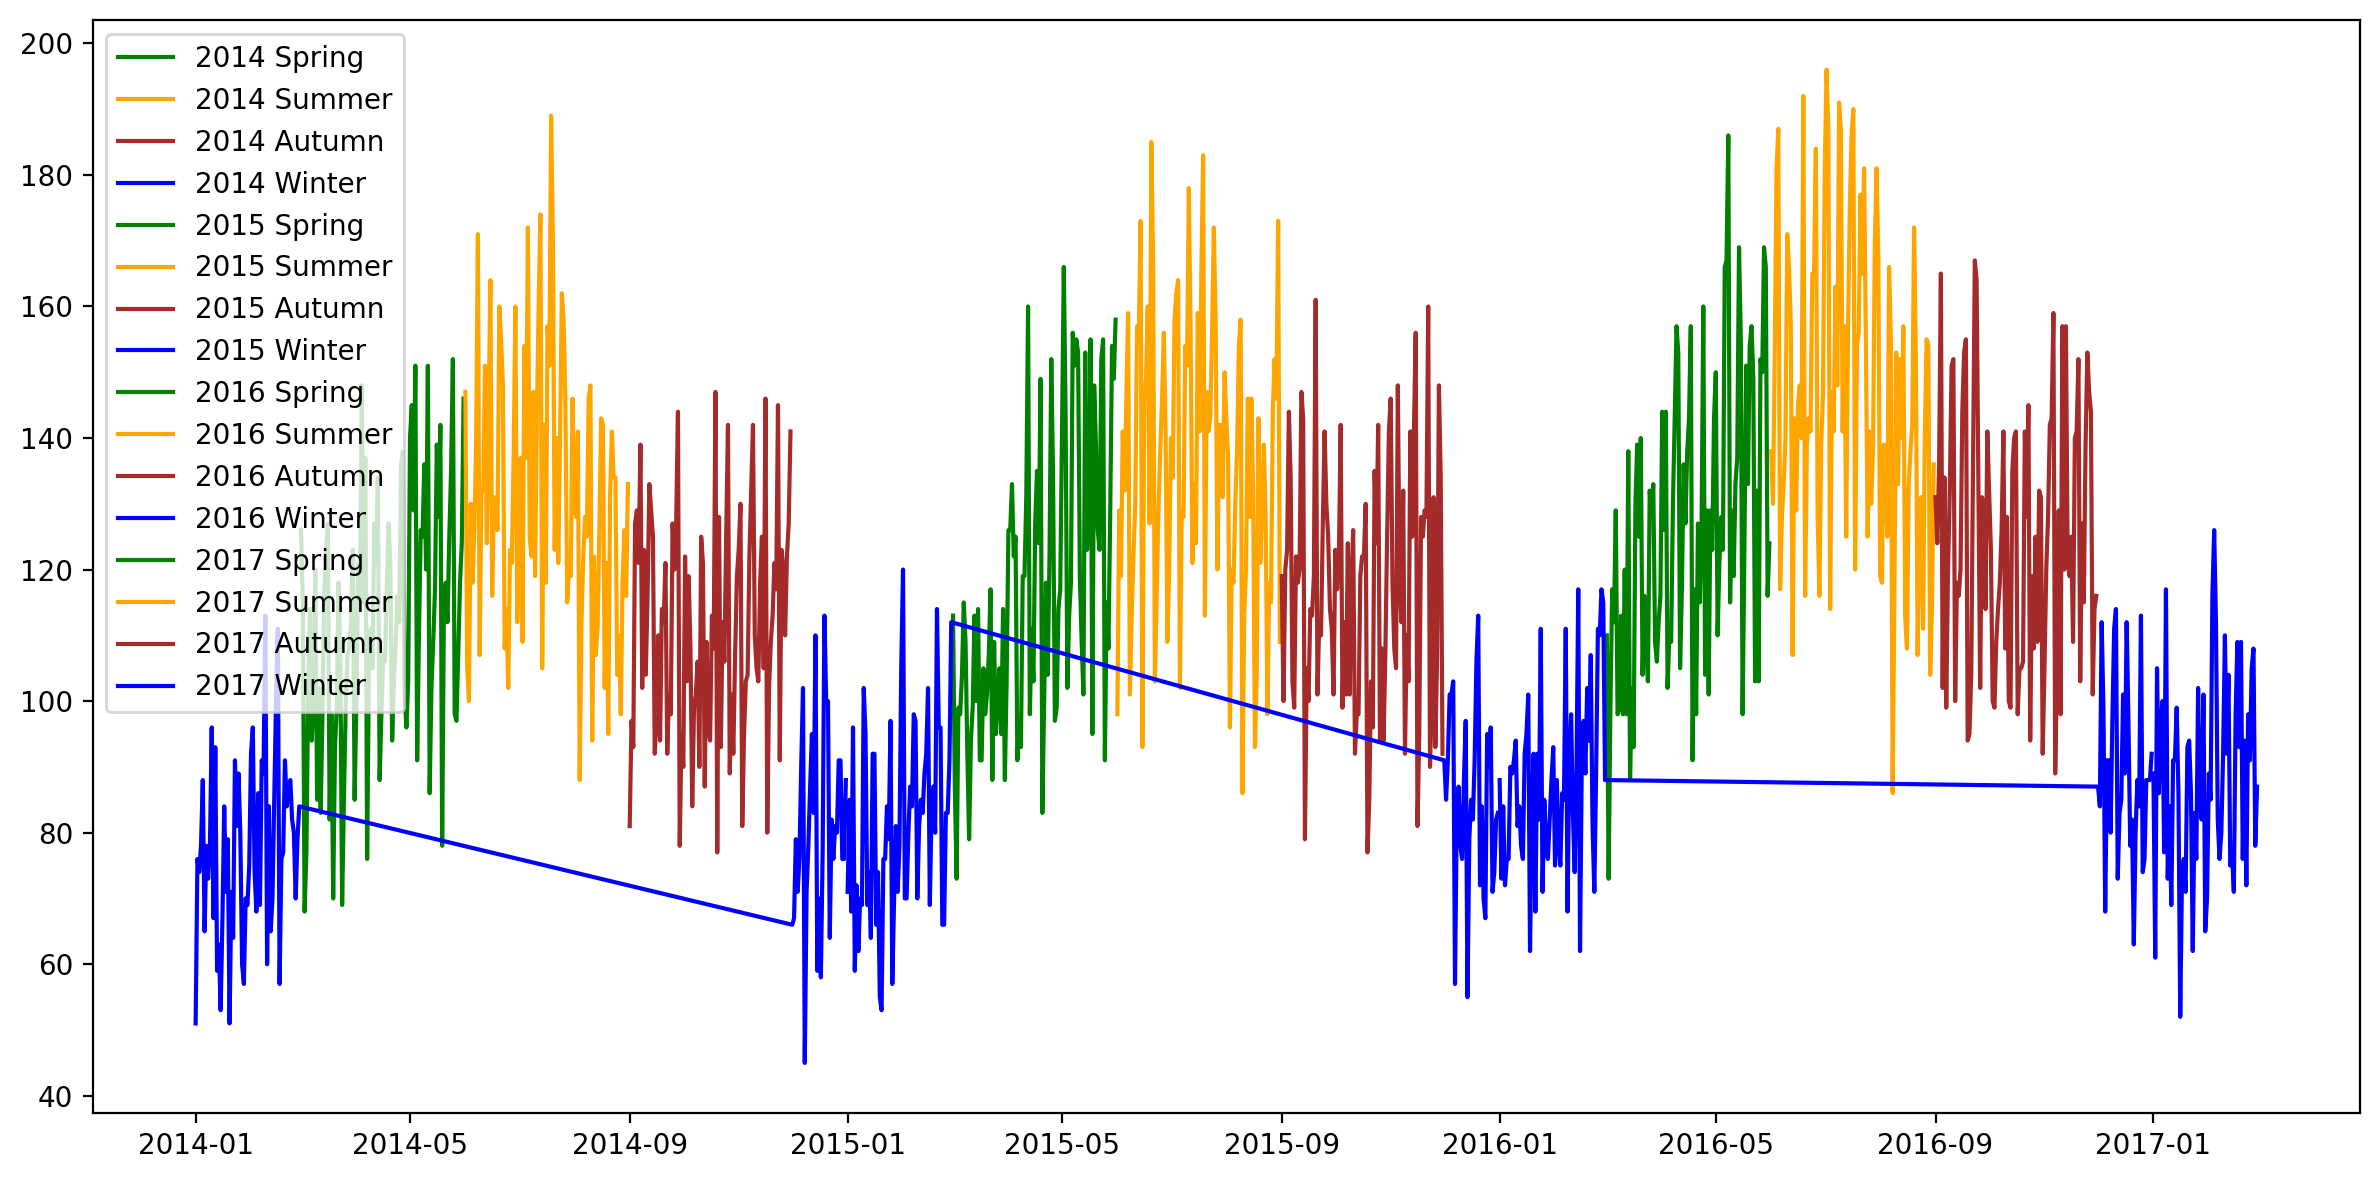

In [29]:
# Date 컬럼을 날짜 형식으로 변환
sales['Date'] = pd.to_datetime(sales['Date'])
 
# 날짜를 계절으로 변환하는 함수
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
 
# 연도 정보를 추출
sales['Year'] = sales['Date'].dt.year
 
# 계절 정보를 추출
sales['Season'] = sales['Date'].apply(get_season)
 
# 대상 상품의 데이터만 추출
sales_product_42 = sales[sales['Product_ID'] == 42]
 
# 함수 수정
def show_seasonal_trend(col, data):
    plt.figure(figsize=(12, 6))
    # 각 계절에 대한 색상 설정
    season_colors = {'Spring': 'green', 'Summer': 'orange', 'Autumn': 'brown', 'Winter': 'blue'}
    for year in data['Year'].unique():
        for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
            temp = data[(data['Year'] == year) & (data['Season'] == season)]
            plt.plot('Date', col, data=temp, label=f'{year} {season}', color=season_colors[season])
    plt.legend()
    plt.tight_layout()
    plt.show()
 
# 함수 호출
show_seasonal_trend('Qty', sales_product_42)

# **주말의 유무에 따른 농산물 제품 판매량 추이**

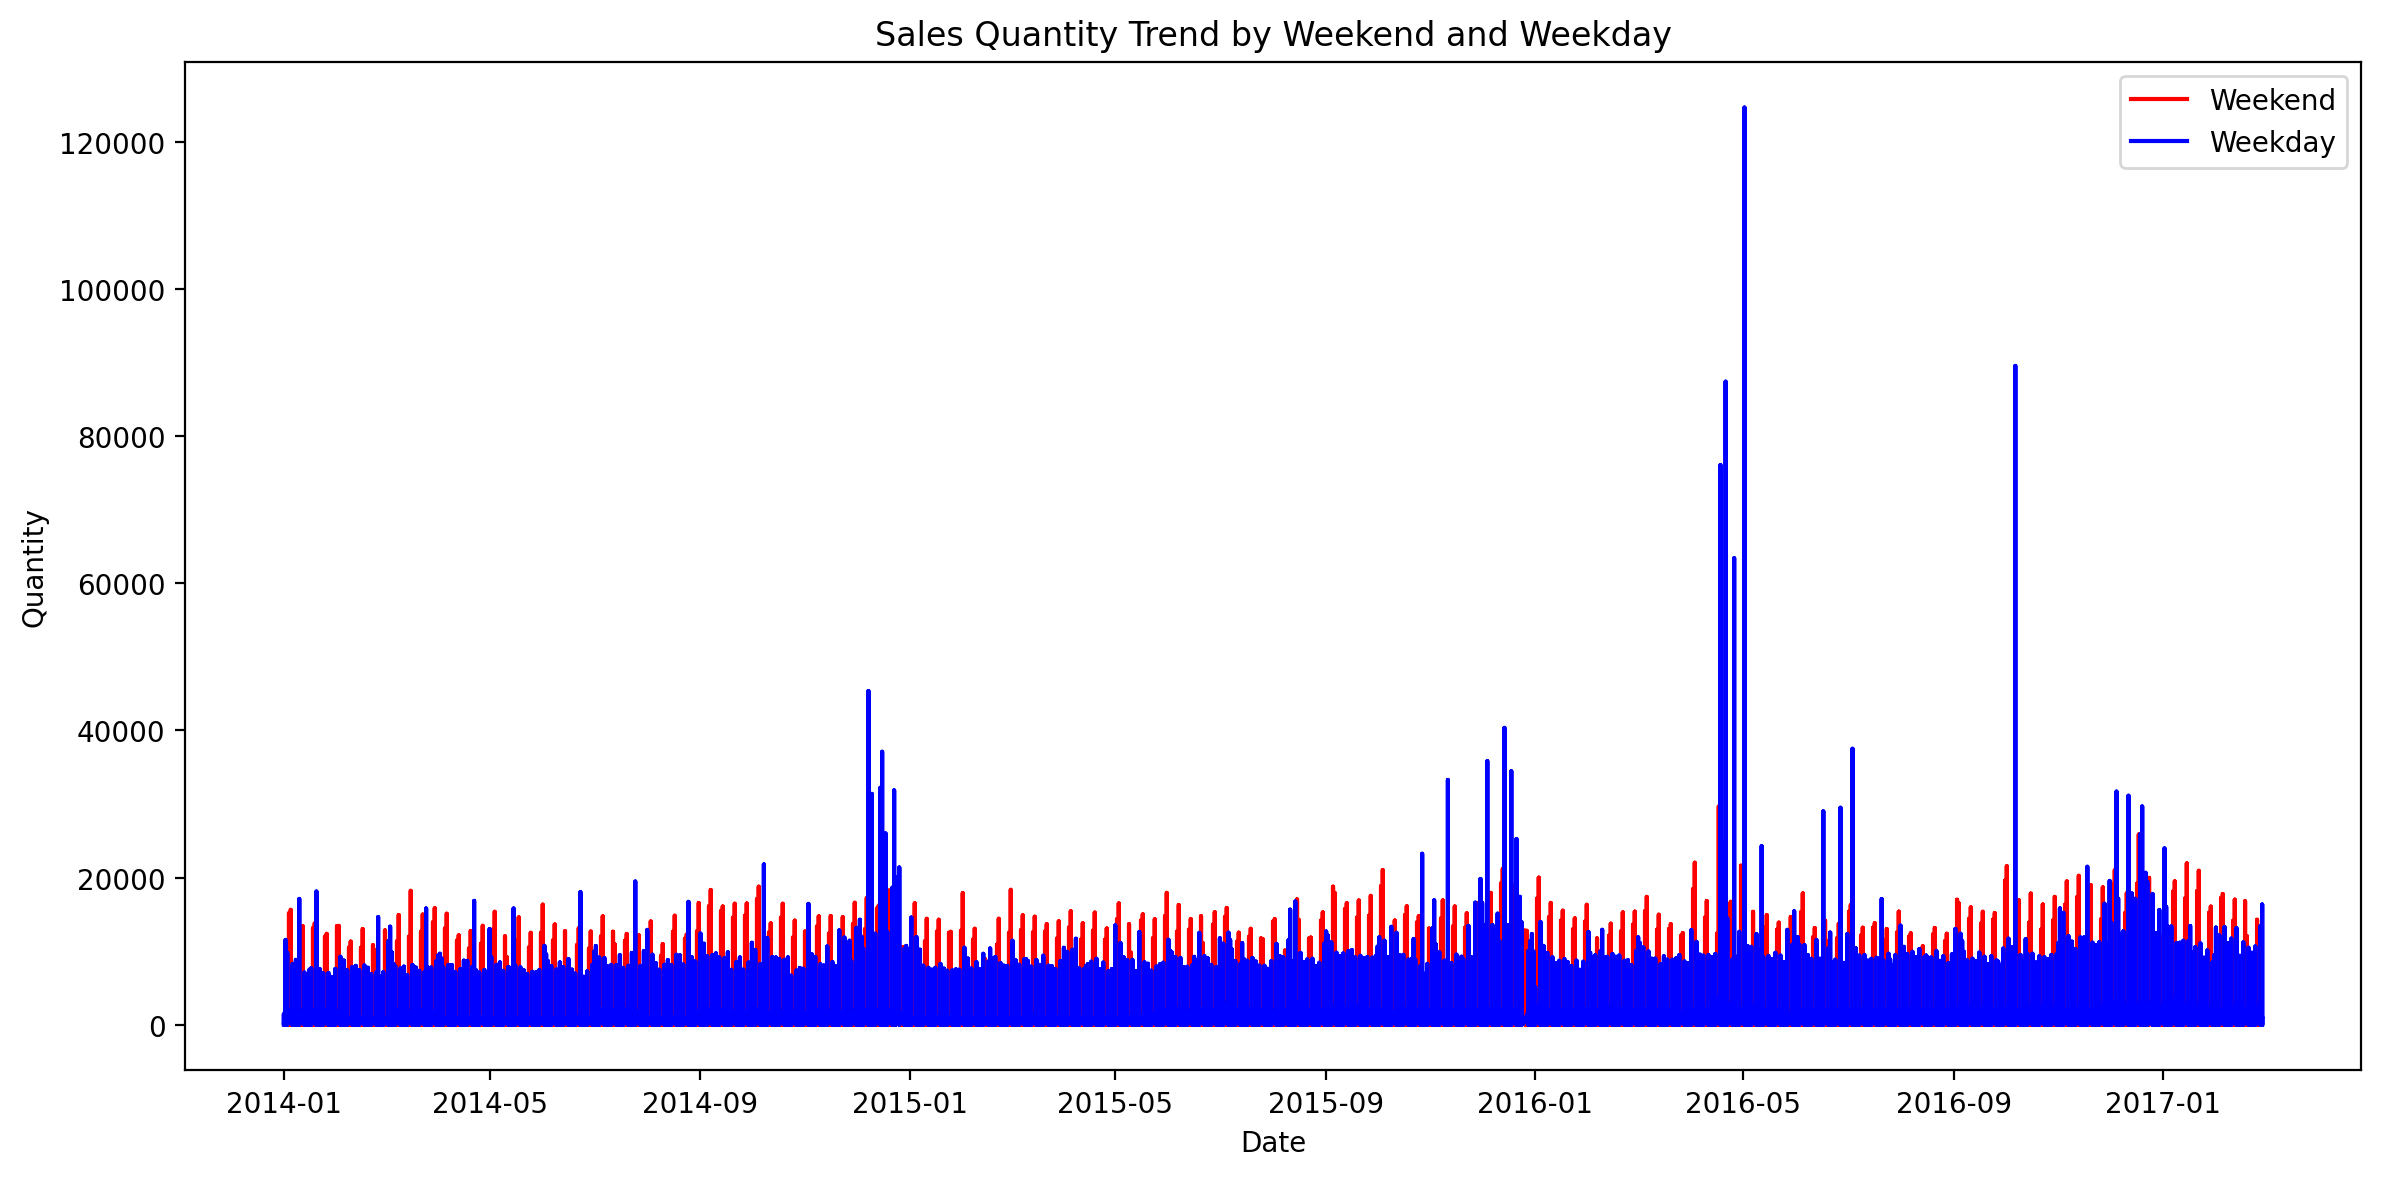

In [54]:
# Date 컬럼을 날짜 형식으로 변환
sales['Date'] = pd.to_datetime(sales['Date'])

# Year 컬럼 추가 (년도도)
sales['Year'] = sales['Date'].dt.year

# Month 컬럼 추가 (월)
sales['Month'] = sales['Date'].dt.month

# Weekend 컬럼 추가 (주말 여부)
sales['Weekend'] = sales['Date'].dt.dayofweek // 5  # 5보다 크면 토요일(1), 일요일(1)로 간주, 그 외에는 평일(0)

# 요일별 컬럼 추가
for day in range(7):  # 월요일(0)부터 일요일(6)까지 반복
    sales[f'Day_{day}'] = (sales['Date'].dt.dayofweek == day).astype(int)  # 해당 요일이면 1, 아니면 0

# 주말과 주중 데이터 분리
weekend_data = sales[sales['Weekend'] == 1]
weekday_data = sales[sales['Weekend'] == 0]

# 선 그래프 그리기
plt.figure(figsize=(12, 6))

# 주말 선 그래프
plt.plot(weekend_data['Date'], weekend_data['Qty'], label='Weekend', color='red')

# 주중 선 그래프
plt.plot(weekday_data['Date'], weekday_data['Qty'], label='Weekday', color='blue')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Sales Quantity Trend by Weekend and Weekday')
plt.legend()
plt.tight_layout()
plt.show()

## **(5) 패턴 정리하기**

* 다양한 탐색을 통해 찾은 시계열 패턴을 적어보세요.

In [ ]:
# 계절별 농수산 판매량을 살펴보니 여름에 가장 많은 판매량이 발생하고 겨울에 판매량이 낮아지는 것으로 확인
# 계절과 농수산 제품의 판매량은 강한 상관관계를 가지는 것 같다.

In [ ]:
# 음료
# 연간 4월과 10월에 가장 많이 팔린다.
# 2월과 3월에는 다소 낮은 경향이 있다.
# 와인
# 12월에 가장 많이 팔리고 3월에 적게 팔린다.
 
# Drink는 휘발류 가격 변동에 영향을 받는다.
 
# 또한 토요일의 판매량이 가장 폭이 크다.

In [ ]:
# 우유 연간 4월, 12월에 가장 많이 팔린다. 방문자 수 또한 12월이 가장 많은 경향을 보인다. 
# 이는 연말에 전체 상품 구매자 수가 늘어남에 따라 우유 판매량 또한 증가한 것으로 보인다. 
# 연말에는 따뜻한 우유와 같은 음료를 마시고, 베이킹이나 연말 케이크를 만드는데 우유가 필요하기 때문에 
# 12월의 우유 판매량이 많은 것이 아닌가 추측된다.